# **Project 5 - Credit Card Users - Churn Prediction**

**Description**

**Background & Context**

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

You need to identify the best possible model that will give the required performance

**Objective**

1) Explore and visualize the dataset.

2) Build a classification model to predict if the customer is going to churn or not

3) Optimize the model using appropriate techniques

4) Generate a set of insights and recommendations that will help the bank

**Data Dictionary:**

* **CLIENTNUM:** Client number. Unique identifier for the customer holding the account
* **Attrition_Flag:** Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
* **Customer_Age:** Age in Years
* **Gender:** Gender of the account holder
* **Dependent_count:** Number of dependents
* **Education_Level:**  Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to a college student), Post-Graduate, Doctorate.
* **Marital_Status:** Marital Status of the account holder
* **Income_Category:** Annual Income Category of the account holder
* **Card_Category:** Type of Card
* **Months_on_book:** Period of relationship with the bank
* **Total_Relationship_Count:** Total no. of products held by the customer
* **Months_Inactive_12_mon:** No. of months inactive in the last 12 months
* **Contacts_Count_12_mon:** No. of Contacts between the customer and bank in the last 12 months
* **Credit_Limit:** Credit Limit on the Credit Card
* **Total_Revolving_Bal:** The balance that carries over from one month to the next is the revolving balance
* **Avg_Open_To_Buy:** Open to Buy refers to the amount left on the credit card to use (Average of last 12 months)
* **Total_Trans_Amt:** Total Transaction Amount (Last 12 months)
* **Total_Trans_Ct:** Total Transaction Count (Last 12 months)
* **Total_Ct_Chng_Q4_Q1:** Ratio of the total transaction count in 4th quarter and the total transaction count in 1st quarter
* **Total_Amt_Chng_Q4_Q1:** Ratio of the total transaction amount in 4th quarter and the total transaction amount in 1st quarter
* **Avg_Utilization_Ratio:** Represents how much of the available credit the customer spent

In [ ]:
# To help with reading and manipulating data
import pandas as pd
import numpy as np

# To help with data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# To be used for missing value imputation
from sklearn.impute import SimpleImputer

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
)

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To be used for tuning the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")


In [ ]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores and split data
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
)

# To impute missing values
from sklearn.impute import KNNImputer

# To bin continuous data into intervals
from sklearn.preprocessing import KBinsDiscretizer

# To build a logistic regression model
from sklearn.linear_model import LogisticRegression

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To suppress the warnings
import warnings


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Machine Learning Course/Feature Selection, Model Selection and Tuning/Project/BankChurners.csv')

In [ ]:
data = df.copy()

In [ ]:
df.head(10)

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   
5  713061558  Existing Customer            44      M                2   
6  810347208  Existing Customer            51      M                4   
7  818906208  Existing Customer            32      M                0   
8  710930508  Existing Customer            37      M                3   
9  719661558  Existing Customer            48      M                2   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School            NaN  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   
5        Graduate        Married     $40K - $60K          Blue   
6             NaN        Married         $120K +          Gold   
7     High School            NaN     $60K - $80K        Silver   
8      Uneducated         Single     $60K - $80K          Blue   
9        Graduate         Single    $80K - $120K          Blue   

   Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0              39                         5                       1   
1              44                         6                       1   
2              36                         4                       1   
3              34                         3                       4   
4              21                         5                       1   
5              36                         3                       1   
6              46                         6                       1   
7              27                         2                       2   
8              36                         5                       2   
9              36                         6                       3   

   Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0                      3     12691.000                  777        11914.000   
1                      2      8256.000                  864         7392.000   
2                      0      3418.000                    0         3418.000   
3                      1      3313.000                 2517          796.000   
4                      0      4716.000                    0         4716.000   
5                      2      4010.000                 1247         2763.000   
6                      3     34516.000                 2264        32252.000   
7                      2     29081.000                 1396        27685.000   
8                      0     22352.000                 2517        19835.000   
9                      3     11656.000                 1677         9979.000   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   
5                 1.376             1088              24                0.846   
6                 1.975             1330              31                0.722   
7                 2.204             1538              36                0.714   
8                 3.355             1350              24                1.182   

In [ ]:
df.sample(10)

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
3289  716306583  Attrited Customer            64      M                0   
246   713779908  Existing Customer            46      F                3   
2047  711327558  Existing Customer            38      M                2   
520   715449333  Existing Customer            55      F                3   
9229  715754133  Existing Customer            42      F                3   
4687  779926608  Existing Customer            50      F                2   
1290  710475408  Existing Customer            33      M                3   
8775  712058133  Existing Customer            54      F                2   
9378  719719158  Existing Customer            38      M                4   
8739  787502883  Existing Customer            60      F                1   

     Education_Level Marital_Status Income_Category Card_Category  \
3289        Graduate         Single  Less than $40K          Blue   
246        Doctorate         Single             abc          Blue   
2047     High School        Married     $40K - $60K          Blue   
520              NaN        Married     $40K - $60K          Blue   
9229        Graduate         Single  Less than $40K          Blue   
4687     High School        Married  Less than $40K          Blue   
1290     High School        Married     $60K - $80K          Blue   
8775         College         Single  Less than $40K          Blue   
9378   Post-Graduate         Single    $80K - $120K        Silver   
8739       Doctorate         Single             abc        Silver   

      Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
3289              36                         3                       3   
246               36                         6                       3   
2047              36                         3                       3   
520               47                         5                       2   
9229              32                         2                       2   
4687              36                         6                       2   
1290              25                         5                       2   
8775              36                         1                       3   
9378              36                         1                       3   
8739              48                         1                       2   

      Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
3289                      5      3812.000                 2517   
246                       2      2189.000                 1666   
2047                      1      2801.000                 1980   
520                       0      1929.000                 1540   
9229                      3      3391.000                 1359   
4687                      1      1438.300                    0   
1290                      2     14918.000                 2028   
8775                      3      2274.000                  708   
9378                      1     34516.000                 1435   
8739                      1     34516.000                 1542   

      Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
3289         1295.000                 0.586             2325              45   
246           523.000                 0.343             1287              36   
2047          821.000                 0.882             1600              45   
520           389.000                 1.142             2354              50   
9229         2032.000                 0.662            13212             107   
4687         1438.300                 0.909             4697              82   
1290        12890.000                 1.342             2171              35   
8775         1566.000                 0.677             7735              74   
9378        33081.000                 0.865            15584             114   
8739        32974.000                 0.603             7443       

In [ ]:
df.tail(10)

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
10117  712503408  Existing Customer            57      M                2   
10118  713755458  Attrited Customer            50      M                1   
10119  716893683  Attrited Customer            55      F                3   
10120  710841183  Existing Customer            54      M                1   
10121  713899383  Existing Customer            56      F                1   
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
10117        Graduate        Married    $80K - $120K          Blue   
10118             NaN            NaN    $80K - $120K          Blue   
10119      Uneducated         Single             abc          Blue   
10120     High School         Single     $60K - $80K          Blue   
10121        Graduate         Single  Less than $40K          Blue   
10122        Graduate         Single     $40K - $60K          Blue   
10123             NaN       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate            NaN     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
10117              40                         6                       3   
10118              36                         6                       3   
10119              47                         4                       3   
10120              34                         5                       2   
10121              50                         4                       1   
10122              40                         3                       2   
10123              25                         4                       2   
10124              36                         5                       3   
10125              36                         4                       3   
10126              25                         6                       2   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
10117                      4     17925.000                 1909   
10118                      4      9959.000                  952   
10119                      3     14657.000                 2517   
10120                      0     13940.000                 2109   
10121                      4      3688.000                  606   
10122                      3      4003.000                 1851   
10123                      3      4277.000                 2186   
10124                      4      5409.000                    0   
10125                      3      5281.000                    0   
10126                      4     10388.000                 1961   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
10117        16016.000                 0.712            17498             111   
10118         9007.000                 0.825            10310              63   
10119        12140.000                 0.166             6009              53   
10120        11831.000                 0.660            15577             114   
10121         3082.000                 0.570            14596             120   
10122         2152.000                 0.703            15476             117   
10123         2091.000                 0.804             8764              69   
10124         5409.000                 0.819            10291              60   
10125         5281.000                 0.535             8395              62   
10126         

In [ ]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

After taking a loot at the values in the variables, the following variables should be of categorical type

* **Attrition_Flag**
* **Gender**
* **Dependent_count**
* **Education_Level**
* **Marital_Status**
* **Income_Category**
* **Card_Category**
* **Total_Relationship_Count**
* **Months_Inactive_12_mon**
* **Contacts_Count_12_mon**

In [ ]:
cat_columns = ['Attrition_Flag','Gender','Dependent_count','Education_Level','Marital_Status','Income_Category','Card_Category'
                ,'Total_Relationship_Count','Months_Inactive_12_mon','Contacts_Count_12_mon']

In [ ]:
df.shape

(10127, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

From our basic data analysis, looks like there are missing values in:
* **Education Level**
* **Marital_Status**

We will take a look at the values present on the columns later if other columns are to be treated for missing values.

In [ ]:
for column in cat_columns:
  print(df[column].value_counts())
  print("-"*50)

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
--------------------------------------------------
F    5358
M    4769
Name: Gender, dtype: int64
--------------------------------------------------
3    2732
2    2655
1    1838
4    1574
0     904
5     424
Name: Dependent_count, dtype: int64
--------------------------------------------------
Graduate         3128
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
--------------------------------------------------
Married     4687
Single      3943
Divorced     748
Name: Marital_Status, dtype: int64
--------------------------------------------------
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
abc               1112
$120K +            727
Name: Income_Category, dtype: int64
--------------------------------------------------
Blue        9436
Silver       555
Go

Taking a look at the categorical columns, all columns except the Income_Category seem to have correct information. The column contain values - abc which does not make sense for this column. It could be a mistake or a substitute for null values. Hence we will replace these values with null values during out data pre-processing stage and treat those missing values later.

In [ ]:
df.describe().T

count          mean          std           min  \
CLIENTNUM                10127.000 739177606.334 36903783.450 708082083.000   
Customer_Age             10127.000        46.326        8.017        26.000   
Dependent_count          10127.000         2.346        1.299         0.000   
Months_on_book           10127.000        35.928        7.986        13.000   
Total_Relationship_Count 10127.000         3.813        1.554         1.000   
Months_Inactive_12_mon   10127.000         2.341        1.011         0.000   
Contacts_Count_12_mon    10127.000         2.455        1.106         0.000   
Credit_Limit             10127.000      8631.954     9088.777      1438.300   
Total_Revolving_Bal      10127.000      1162.814      814.987         0.000   
Avg_Open_To_Buy          10127.000      7469.140     9090.685         3.000   
Total_Amt_Chng_Q4_Q1     10127.000         0.760        0.219         0.000   
Total_Trans_Amt          10127.000      4404.086     3397.129       510.000   
Total_Trans_Ct           10127.000        64.859       23.473        10.000   
Total_Ct_Chng_Q4_Q1      10127.000         0.712        0.238         0.000   
Avg_Utilization_Ratio    10127.000         0.275        0.276         0.000   

                                   25%           50%           75%  \
CLIENTNUM                713036770.500 717926358.000 773143533.000   
Customer_Age                    41.000        46.000        52.000   
Dependent_count                  1.000         2.000         3.000   
Months_on_book                  31.000        36.000        40.000   
Total_Relationship_Count         3.000         4.000         5.000   
Months_Inactive_12_mon           2.000         2.000         3.000   
Contacts_Count_12_mon            2.000         2.000         3.000   
Credit_Limit                  2555.000      4549.000     11067.500   
Total_Revolving_Bal            359.000      1276.000      1784.000   
Avg_Open_To_Buy               1324.500      3474.000      9859.000   
Total_Amt_Chng_Q4_Q1             0.631         0.736         0.859   
Total_Trans_Amt               2155.500      3899.000      4741.000   
Total_Trans_Ct                  45.000        67.000        81.000   
Total_Ct_Chng_Q4_Q1              0.582         0.702         0.818   
Avg_Utilization_Ratio            0.023         0.176         0.503   

                                   max  
CLIENTNUM                828343083.000  
Customer_Age                    73.000  
Dependent_count                  5.000  
Months_on_book                  56.000  
Total_Relationship_Count         6.000  
Months_Inactive_12_mon           6.000  
Contacts_Count_12_mon            6.000  
Credit_Limit                 34516.000  
Total_Revolving_Bal           2517.000  
Avg_Open_To_Buy              34516.000  
Total_Amt_Chng_Q4_Q1             3.397  
Total_Trans_Amt              18484.000  
Total_Trans_Ct                 139.000  
Total_Ct_Chng_Q4_Q1              3.714  
Avg_Utilization_Ratio            0.999

Summary of Basic Data Analysis:
* The following variables should be of categorical type
  * Attrition_Flag
  * Gender
  * Dependent_count
  * Education_Level
  * Marital_Status
  * Income_Category
  * Card_Category
  * Total_Relationship_Count
  * Months_Inactive_12_mon
  * Contacts_Count_12_mon
* There are missing values in:
  * Education Level
  * Marital_Status
* Income_Category column seem to have been filled with abc for nan or missing values. These must be replaced as nans and treated for missing values.
* Our output variable **"Attrition_Flag"** seem to have imbalance data.
  * Attited Customer - 1627
  * Existing CUstomer - 8500

  Hence, over sampling or under sampling techniques have to be performed for better models.
* The average age of the customers ~ 46
* Dependent count varies from 0 to 5
* On an average the customers have had ~36 months of relationship with the bank.
* Some customers have remained inactive for a maximum of 6 months from the data.
* On an average the number of contacts that the customers made with the bank in the last 12 months is ~ 2
* The average credit limit of the customers in the dataset is 8631, which is way more when compared to the minimum credit limit ~1438 and a bit higher than the 50th percentile of 4549 indicating the data has more data towards higher side.
* On an average customers have had an total revolving balance of ~1162.
* On an average, the amount left on the credit card for last 12 months has been around 7469. When we compare this with the average credit limit of 8631, on an average only around 1000 has been used. Hence we can expect majority of the customers to have less credit utilization.
* The average total transaction amount of the customers is around 4404
* The average total transaction count averaged across the whole year is ~64. Therefore, we can assume that most customers have made many small amount transactions.
* The average utilization ratio is less as expected and is around 0.275
* If we take a look at the average ratio of the total transaction count in 4th quarter and 1st quarter and the average ratio of the total transaction amount in the 4th and 1st quarter - the values are 0.712 and 0.760 respectively. **This is a strong indication that customers have made a lot of transactions and a lot of amount has been spent in the 4th quearter compared to 1st quarter.** This could be because of the festival season.   



## Data Pre-processing

Let us see the values in Income_Category column

In [ ]:
df['Income_Category'].value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
abc               1112
$120K +            727
Name: Income_Category, dtype: int64

Let us replace the abc values with nans

In [ ]:
df['Income_Category'].replace({"abc": np.nan}, inplace =True)

In [ ]:
df['Income_Category'].value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
$120K +            727
Name: Income_Category, dtype: int64

In [ ]:
df.sample(10)

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
9518  711227883  Existing Customer            41      F                2   
1307  786557358  Existing Customer            44      F                1   
5014  719054733  Existing Customer            52      F                0   
4382  712693908  Attrited Customer            43      M                3   
1257  720141408  Attrited Customer            49      F                2   
7868  820925433  Existing Customer            50      F                2   
9582  721402233  Existing Customer            42      M                3   
3958  721440633  Existing Customer            55      F                1   
9053  718276758  Existing Customer            52      F                1   
7951  779890833  Existing Customer            51      F                2   

     Education_Level Marital_Status Income_Category Card_Category  \
9518        Graduate         Single  Less than $40K          Blue   
1307             NaN        Married  Less than $40K          Blue   
5014   Post-Graduate         Single  Less than $40K          Blue   
4382        Graduate        Married         $120K +          Blue   
1257        Graduate         Single  Less than $40K          Blue   
7868   Post-Graduate         Single  Less than $40K          Blue   
9582      Uneducated        Married         $120K +          Blue   
3958     High School         Single  Less than $40K          Blue   
9053        Graduate         Single     $40K - $60K          Blue   
7951     High School       Divorced  Less than $40K          Blue   

      Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
9518              21                         2                       3   
1307              38                         5                       2   
5014              40                         4                       3   
4382              31                         2                       4   
1257              31                         5                       1   
7868              45                         2                       3   
9582              28                         2                       3   
3958              36                         5                       2   
9053              40                         2                       1   
7951              36                         2                       1   

      Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
9518                      3      3624.000                 1641   
1307                      4      3242.000                  799   
5014                      2      1438.300                  797   
4382                      1     13883.000                  783   
1257                      2      5456.000                  951   
7868                      2      1529.000                  710   
9582                      1     19192.000                 1507   
3958                      3      7982.000                  897   
9053                      2      4705.000                  890   
7951                      1      1438.300                    0   

      Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
9518         1983.000                 0.833            15824             121   
1307         2443.000                 0.459             1424              37   
5014          641.300                 0.870             4673              69   
4382        13100.000                 0.749             1871              32   
1257         4505.000                 0.737             1096              27   
7868          819.000                 0.657             4751              81   
9582        17685.000                 0.594            15615             125   
3958         7085.000                 0.778             4387              71   
9053         3815.000                 0.723             8226              97   
7951         1438.300                 0.765             4866       

In [ ]:
df.isnull().sum()

CLIENTNUM                      0
Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category             1112
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

We have now converted the 'abc' values in the **Income_Category** column. We will treat these missing values with imputing later.

The column **CLIENTNUM** is the unique identifier and is not needed. Hence we can remove that column

In [ ]:
df.drop(['CLIENTNUM'], axis = 1, inplace=True)

In [ ]:
df.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           8608 non-null   object 
 5   Marital_Status            9378 non-null   object 
 6   Income_Category           9015 non-null   object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

Let us convert the categorical columns

In [ ]:
for col in cat_columns:
  df[col] = df[col].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Attrition_Flag            10127 non-null  category
 1   Customer_Age              10127 non-null  int64   
 2   Gender                    10127 non-null  category
 3   Dependent_count           10127 non-null  category
 4   Education_Level           8608 non-null   category
 5   Marital_Status            9378 non-null   category
 6   Income_Category           9015 non-null   category
 7   Card_Category             10127 non-null  category
 8   Months_on_book            10127 non-null  int64   
 9   Total_Relationship_Count  10127 non-null  category
 10  Months_Inactive_12_mon    10127 non-null  category
 11  Contacts_Count_12_mon     10127 non-null  category
 12  Credit_Limit              10127 non-null  float64 
 13  Total_Revolving_Bal       10127 non-null  int6

All the datatypes of the columns now seem to be correct.

Let us see if we could split the age column into bins and see how the data is spread across different age groups

In [ ]:
df['Customer_Age'].value_counts()

44    500
49    495
46    490
45    486
47    479
43    473
48    472
50    452
42    426
51    398
53    387
41    379
52    376
40    361
39    333
54    307
38    303
55    279
56    262
37    260
57    223
36    221
35    184
59    157
58    157
34    146
33    127
60    127
32    106
65    101
61     93
62     93
31     91
26     78
30     70
63     65
29     56
64     43
27     32
28     29
67      4
66      2
68      2
70      1
73      1
Name: Customer_Age, dtype: int64

In [ ]:
df['Agebin'] = pd.cut(df['Customer_Age'], bins = [25,35,45,55,65,75], labels = ['25-35', '36-45', '46-55', '56-65','66-75'])

In [ ]:
df['Agebin'].value_counts()

46-55    4135
36-45    3742
56-65    1321
25-35     919
66-75      10
Name: Agebin, dtype: int64

Looks like most of the customers data are in the age group of 46 - 55

## Exploratory Data Analysis

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=45, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))

### Univariate Analysis

**Attrition_Flag**

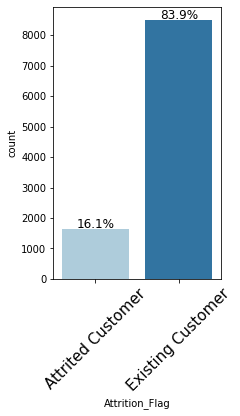

In [ ]:
labeled_barplot(df, "Attrition_Flag", perc=True)

**Customer_Age**

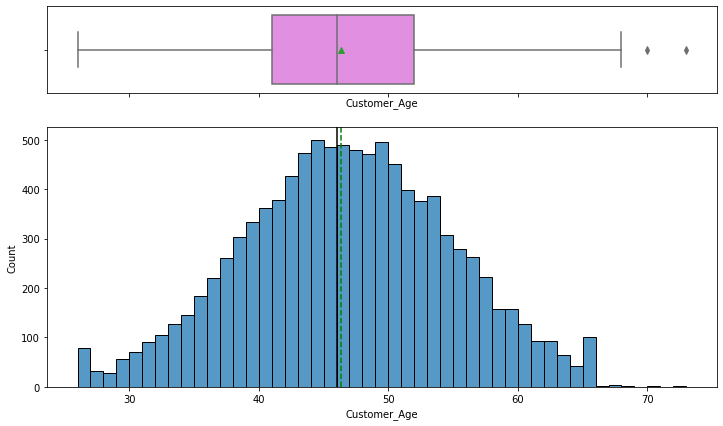

In [ ]:
histogram_boxplot(df,"Customer_Age")

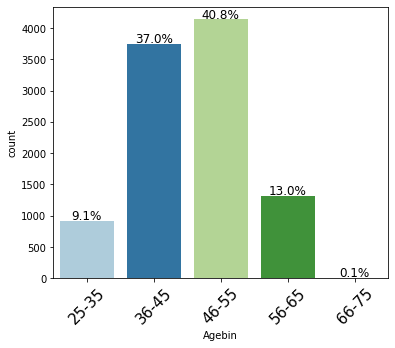

In [ ]:
labeled_barplot(df, "Agebin", perc=True)

**Gender**

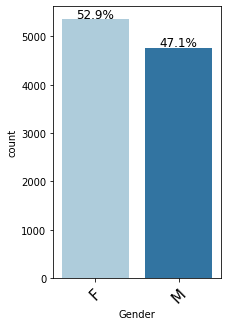

In [ ]:
labeled_barplot(df, "Gender", perc=True)

**Dependent_Count**

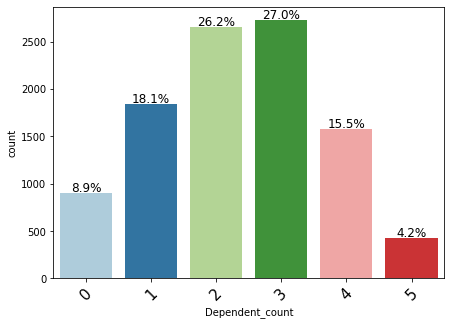

In [ ]:
labeled_barplot(df, "Dependent_count", perc=True)

**Education_Level**

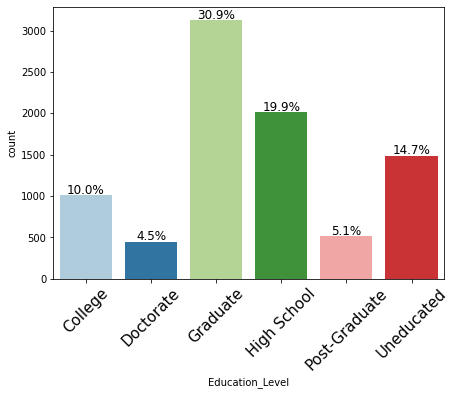

In [ ]:
labeled_barplot(df, "Education_Level", perc=True)

**Marital_Status**

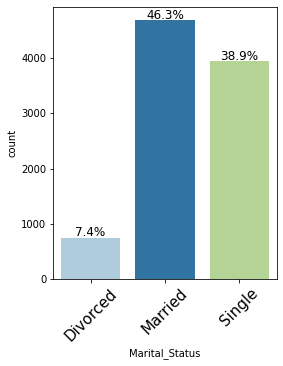

In [ ]:
labeled_barplot(df, "Marital_Status", perc=True)

**Income_Category**

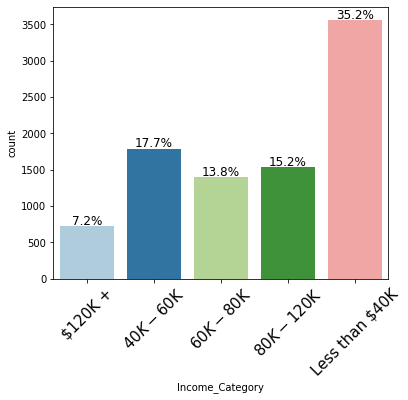

In [ ]:
labeled_barplot(df, "Income_Category", perc=True)

**Card_Category**

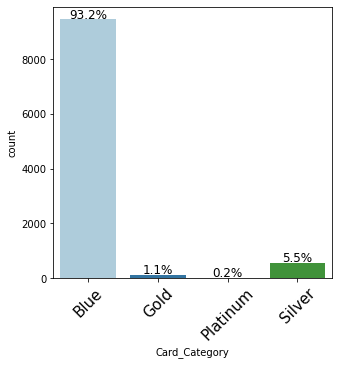

In [ ]:
labeled_barplot(df, "Card_Category", perc=True)

**Months_on_book**

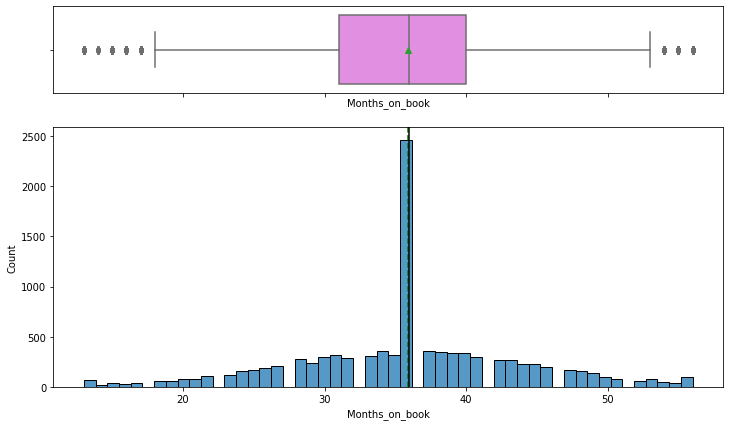

In [ ]:
histogram_boxplot(df,"Months_on_book")

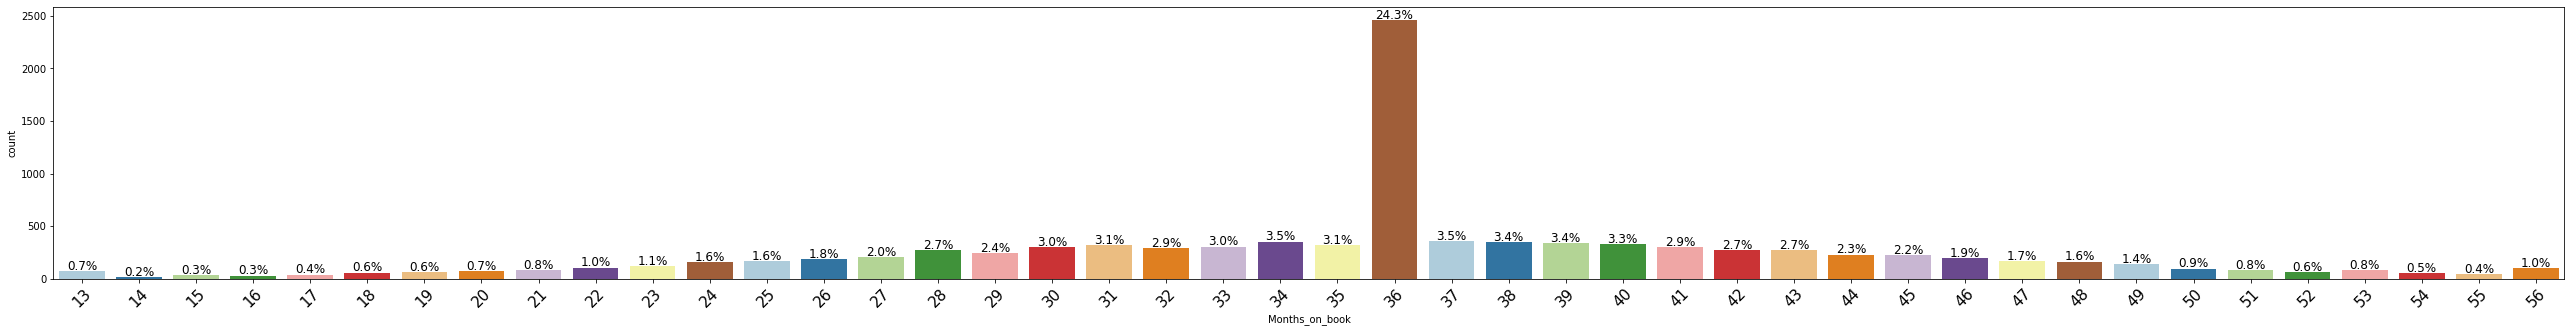

In [ ]:
labeled_barplot(df, "Months_on_book", perc=True)

**Total_Relationship_Count**

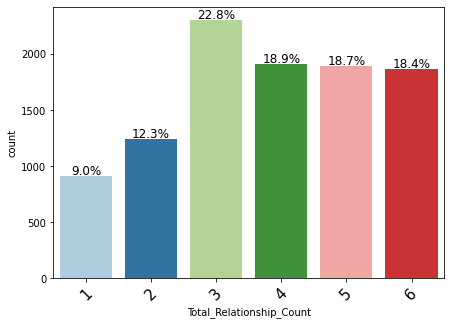

In [ ]:
labeled_barplot(df, "Total_Relationship_Count", perc=True)

**Months_Inactive_12_mon**

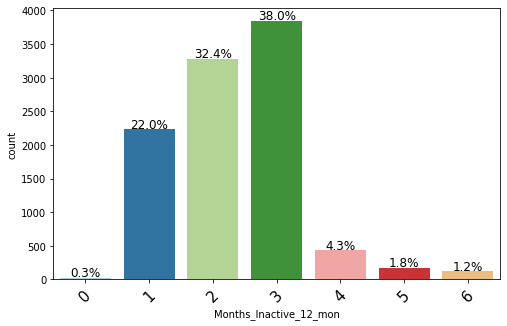

In [ ]:
labeled_barplot(df, "Months_Inactive_12_mon", perc=True)

**Contacts_Count_12_mon**

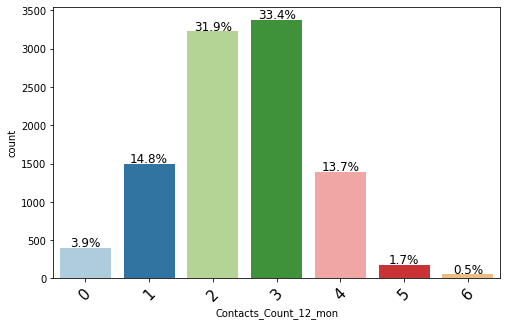

In [ ]:
labeled_barplot(df, "Contacts_Count_12_mon", perc=True)

**Credit_Limit**

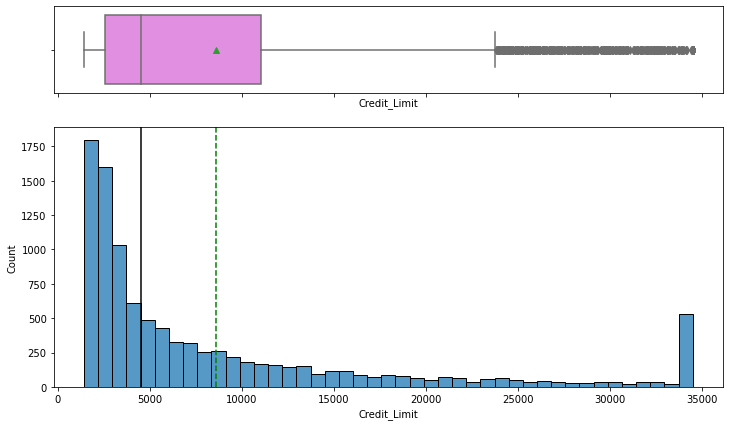

In [ ]:
histogram_boxplot(df,"Credit_Limit")

There are so many data points beyond the upper whisker. Since this is credit limit, it is highly possible to have more values on the higher side. Lets take a look at these data and cross check

In [ ]:
df['Credit_Limit'].describe()

count   10127.000
mean     8631.954
std      9088.777
min      1438.300
25%      2555.000
50%      4549.000
75%     11067.500
max     34516.000
Name: Credit_Limit, dtype: float64

In [ ]:
Q1_credit_limit = df["Credit_Limit"].quantile(0.25)  # 25th quantile
Q3_credit_limit = df["Credit_Limit"].quantile(0.75)  # 75th quantile
IQR_credit_limit = Q3_credit_limit - Q1_credit_limit
Lower_Whisker_income = Q1_credit_limit - 1.5 * IQR_credit_limit
Upper_Whisker_income = Q3_credit_limit + 1.5 * IQR_credit_limit
print(Upper_Whisker_income)

23836.25


In [ ]:
df_higher_credit_limit = df[df['Credit_Limit'] > Upper_Whisker_income]

In [ ]:
df_higher_credit_limit.sample(10)

Attrition_Flag  Customer_Age Gender Dependent_count Education_Level  \
8980   Existing Customer            50      M               2             NaN   
9369   Attrited Customer            41      M               3             NaN   
2269   Existing Customer            36      M               3        Graduate   
3393   Existing Customer            42      M               2             NaN   
9353   Existing Customer            32      M               2        Graduate   
10014  Existing Customer            48      M               5     High School   
6062   Attrited Customer            57      M               3        Graduate   
9300   Existing Customer            58      M               1     High School   
6907   Attrited Customer            62      M               0   Post-Graduate   
9669   Attrited Customer            50      M               1             NaN   

      Marital_Status Income_Category Card_Category  Months_on_book  \
8980          Single    $80K - $120K          Blue              38   
9369         Married     $60K - $80K        Silver              29   
2269          Single         $120K +          Blue              36   
3393         Married         $120K +          Blue              31   
9353         Married    $80K - $120K          Blue              36   
10014        Married    $80K - $120K        Silver              40   
6062          Single         $120K +          Blue              52   
9300         Married    $80K - $120K          Blue              50   
6907        Divorced     $60K - $80K        Silver              46   
9669          Single         $120K +          Blue              37   

      Total_Relationship_Count Months_Inactive_12_mon Contacts_Count_12_mon  \
8980                         2                      3                     1   
9369                         1                      3                     4   
2269                         6                      2                     4   
3393                         3                      2                     4   
9353                         2                      1                     2   
10014                        6                      2                     2   
6062                         6                      4                     3   
9300                         1                      1                     3   
6907                         4                      5                     6   
9669                         4                      3                     2   

       Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
8980      24533.000                 1813        22720.000   
9369      27945.000                    0        27945.000   
2269      24457.000                 1300        23157.000   
3393      34516.000                 1067        33449.000   
9353      25438.000                 1907        23531.000   
10014     34516.000                 1417        33099.000   
6062      34516.000                 1000        33516.000   
9300      34516.000                 1341        33175.000   
6907      28229.000                  287        27942.000   
9669      32563.000                    0        32563.000   

       Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
8980                  0.745             8436              77   
9369                  0.902             8345              70   
2269                  0.914             2739              65   
3393                  0.487             4281              72   
9353                  0.741            16485             104   
10014                 0.692            16579             109   
6062                  0.694             1777              37   
9300                  0.812            13988             127   
6907                  0.594             2281              45   
9669                  1.013             9220              81   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio Agebin  
8980                 0.878               

Generally people with higher credit income will have higher income level and it is also safe to assume that the age of these customers will also be a quite higher considering the experience factor. Hence let us take a look at the age and Income category of these datapoints

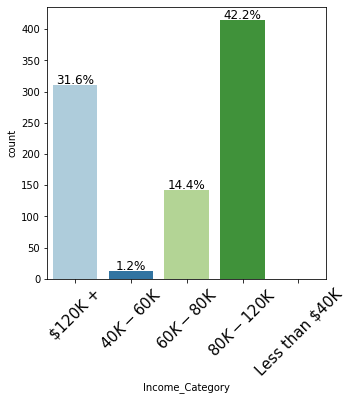

In [ ]:
labeled_barplot(df_higher_credit_limit, "Income_Category", perc=True)

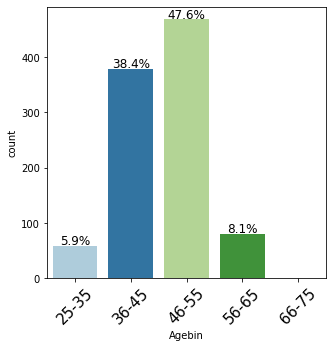

In [ ]:
labeled_barplot(df_higher_credit_limit, "Agebin", perc=True)

As expected, the income for the customers are much higher and are of considerably higher age. Hence these data points cannot truely be considered as outliers. Lets deal with them in the outliers treatment section.

**Total_Revolving_Bal**

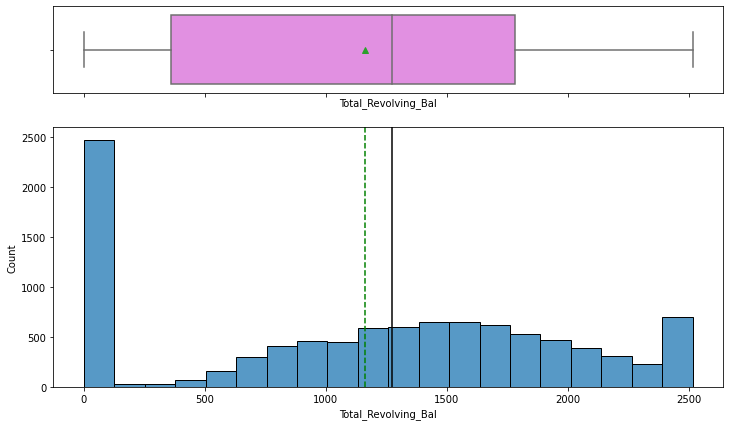

In [ ]:
histogram_boxplot(df,"Total_Revolving_Bal")

**Avg_open_To_Buy**

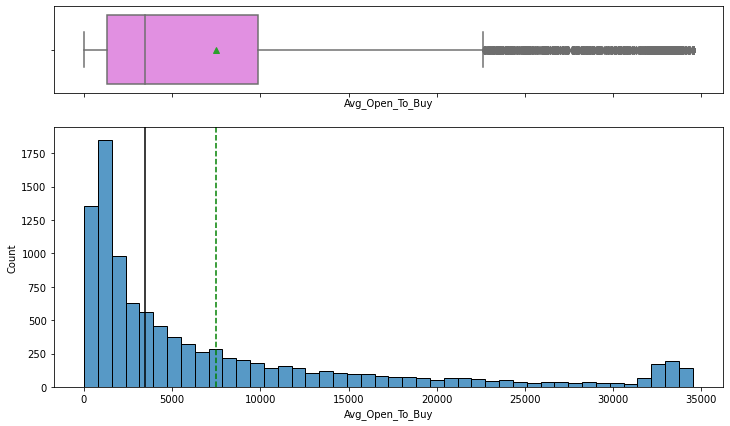

In [ ]:
histogram_boxplot(df,"Avg_Open_To_Buy")

This column has many datapoints beyond the upper whisker. This could be all possible values. For eg. People with higher credit limit if they dont spend much they will have higher amount left on their credi card to use. Let us examine these datapoints further.

In [ ]:
df['Avg_Open_To_Buy'].describe()

count   10127.000
mean     7469.140
std      9090.685
min         3.000
25%      1324.500
50%      3474.000
75%      9859.000
max     34516.000
Name: Avg_Open_To_Buy, dtype: float64

In [ ]:
Q1 = df["Avg_Open_To_Buy"].quantile(0.25)  # 25th quantile
Q3 = df["Avg_Open_To_Buy"].quantile(0.75)  # 75th quantile
IQR = Q3 - Q1
Lower_Whisker_income_avg_open = Q1 - 1.5 * IQR
Upper_Whisker_income_avg_open = Q3 + 1.5 * IQR
print(Upper_Whisker_income_avg_open)

22660.75


In [ ]:
df_high_avg_open_to_buy = df[df['Avg_Open_To_Buy'] >= Upper_Whisker_income_avg_open]

In [ ]:
df_high_avg_open_to_buy.sample(10)

Attrition_Flag  Customer_Age Gender Dependent_count Education_Level  \
8859   Attrited Customer            51      M               3   Post-Graduate   
9116   Existing Customer            39      F               3      Uneducated   
3831   Existing Customer            48      M               3        Graduate   
69     Existing Customer            50      M               2       Doctorate   
2476   Existing Customer            55      M               1        Graduate   
403    Existing Customer            45      M               4             NaN   
715    Existing Customer            50      M               3        Graduate   
4660   Existing Customer            46      M               3      Uneducated   
10051  Attrited Customer            37      M               4     High School   
9304   Existing Customer            53      M               1        Graduate   

      Marital_Status Income_Category Card_Category  Months_on_book  \
8859         Married    $80K - $120K        Silver              37   
9116          Single             NaN        Silver              35   
3831         Married    $80K - $120K          Blue              37   
69           Married    $80K - $120K          Blue              38   
2476         Married    $80K - $120K          Blue              49   
403          Married         $120K +          Blue              33   
715         Divorced    $80K - $120K          Blue              36   
4660          Single         $120K +          Blue              27   
10051         Single     $60K - $80K        Silver              31   
9304          Single    $80K - $120K          Blue              47   

      Total_Relationship_Count Months_Inactive_12_mon Contacts_Count_12_mon  \
8859                         6                      2                     2   
9116                         2                      2                     3   
3831                         5                      2                     1   
69                           6                      2                     2   
2476                         4                      3                     3   
403                          6                      1                     3   
715                          4                      3                     1   
4660                         4                      2                     3   
10051                        1                      3                     3   
9304                         1                      1                     2   

       Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
8859      34516.000                  989        33527.000   
9116      33565.000                 1627        31938.000   
3831      34516.000                 1416        33100.000   
69        25300.000                 1330        23970.000   
2476      28751.000                 2158        26593.000   
403       34516.000                 2086        32430.000   
715       34516.000                 1542        32974.000   
4660      34516.000                 2213        32303.000   
10051     28831.000                 2517        26314.000   
9304      34516.000                 1583        32933.000   

       Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
8859                  1.021             4810              55   
9116                  0.660             8360              94   
3831                  0.491             4026              65   
69                    1.072              837              15   
2476                  0.536             1502              34   
403                   0.986             1859              47   
715                   0.869             1770              65   
4660                  0.584             4492              71   
10051                 0.770             8688              69   
9304                  0.631            12906             100   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio Agebin  
8859                 0.341               

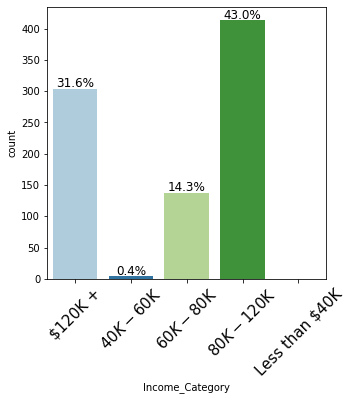

In [ ]:
labeled_barplot(df_high_avg_open_to_buy, "Income_Category", perc=True)

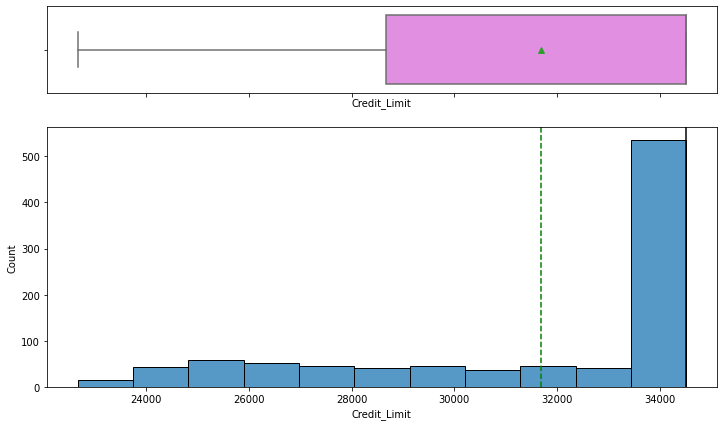

In [ ]:
histogram_boxplot(df_high_avg_open_to_buy,"Credit_Limit")

As suspected, the credit levle of these people are so high that it is actually possible to have values outside the upper whisker for **"Avg_Open_To_Buy"**.

**Total_Amt_Chng_Q4_Q1**

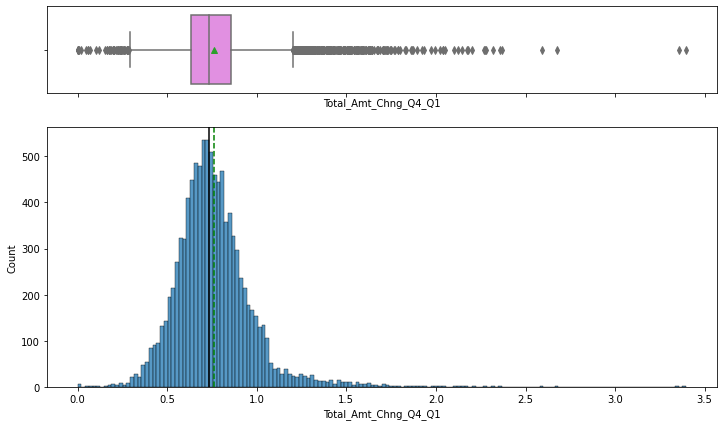

In [ ]:
histogram_boxplot(df,"Total_Amt_Chng_Q4_Q1")

**Total_Trans_Amt**

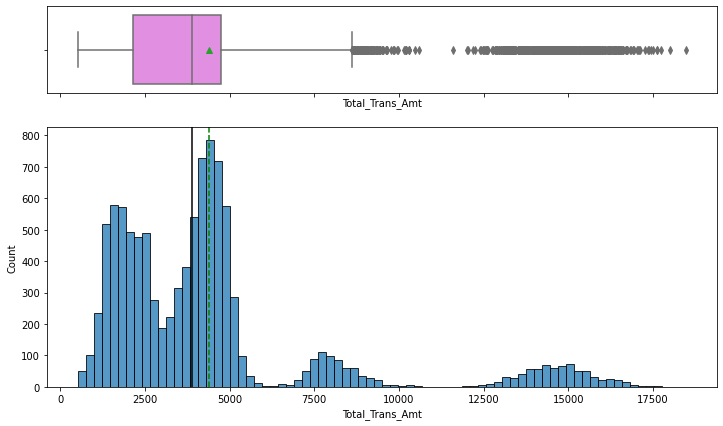

In [ ]:
histogram_boxplot(df,"Total_Trans_Amt")

There appears to be 4 peaks and many datapoints outside the upper whisker. Lets examine these values to see if they are all possible values. People with higher salary and higher credit limit can potentially make transactions that are huge.

In [ ]:
df['Total_Trans_Amt'].describe()

count   10127.000
mean     4404.086
std      3397.129
min       510.000
25%      2155.500
50%      3899.000
75%      4741.000
max     18484.000
Name: Total_Trans_Amt, dtype: float64

In [ ]:
df[df['Total_Trans_Amt'] == 18484.00]

Attrition_Flag  Customer_Age Gender Dependent_count Education_Level  \
9964  Existing Customer            47      M               4             NaN   

     Marital_Status Income_Category Card_Category  Months_on_book  \
9964        Married     $60K - $80K          Blue              36   

     Total_Relationship_Count Months_Inactive_12_mon Contacts_Count_12_mon  \
9964                        4                      5                     2   

      Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
9964     10585.000                 1749         8836.000   

      Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
9964                 0.655            18484             108   

      Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio Agebin  
9964                0.588                  0.165  46-55

In [ ]:
df_higher_total_trans1 = df[df['Total_Trans_Amt'] >= 11250]

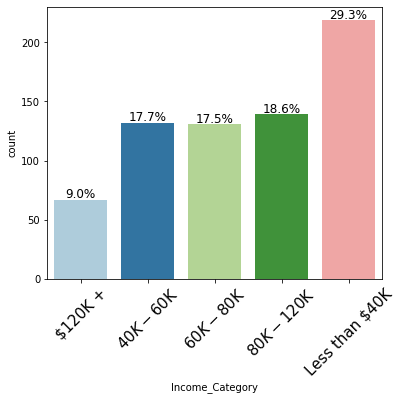

In [ ]:
labeled_barplot(df_higher_total_trans1, "Income_Category", perc=True)

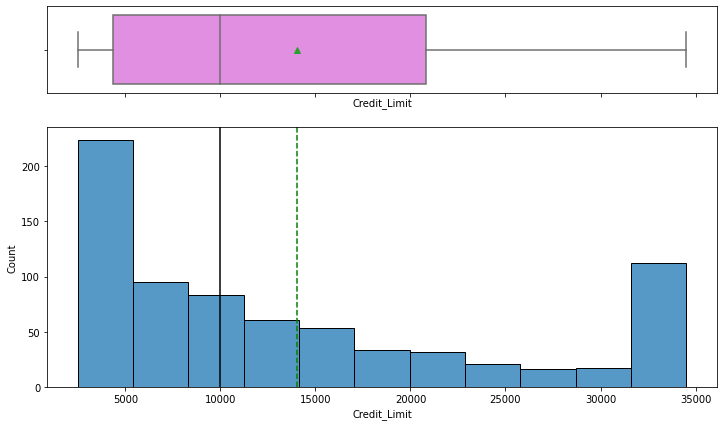

In [ ]:
histogram_boxplot(df_higher_total_trans1,"Credit_Limit")

Surprisingly people who make less money have spent more.  

**Total_Trans_Ct**

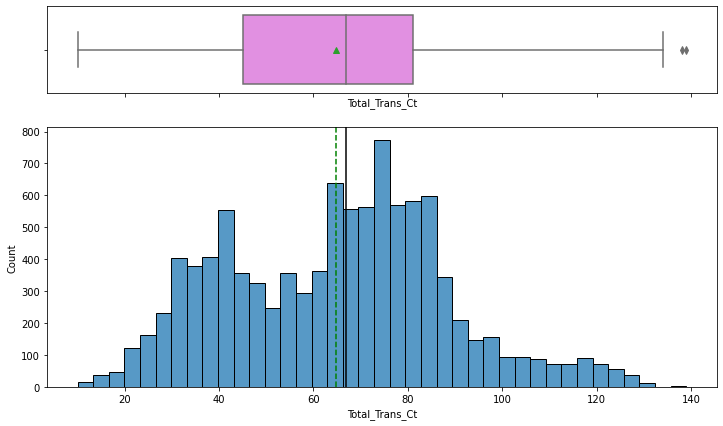

In [ ]:
histogram_boxplot(df,"Total_Trans_Ct")

**Total_Ct_Chng_Q4_Q1**

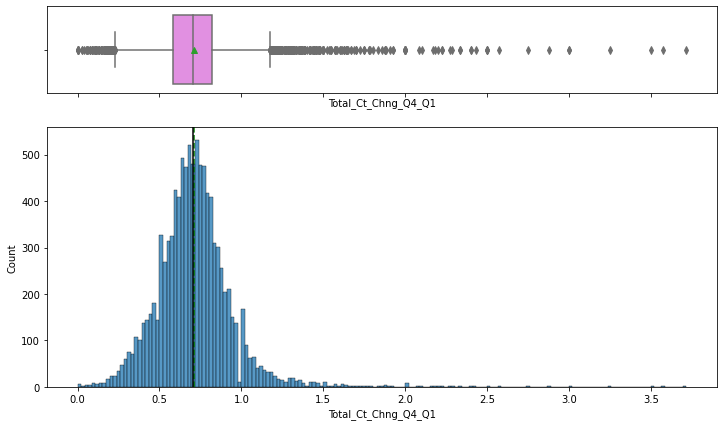

In [ ]:
histogram_boxplot(df,"Total_Ct_Chng_Q4_Q1")

**Avg_Utilization_Ratio**

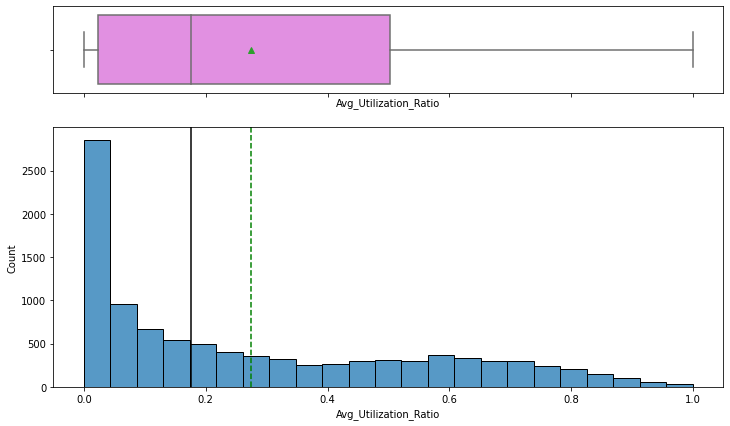

In [ ]:
histogram_boxplot(df,"Avg_Utilization_Ratio")

**Univariate Analysis Insights:**

* Like discussed earlier, the data set has imbalance data. The dataset has high number of Existing Customer and low number of Attrited Customer.
* The variable Customer_Age has a nice looking normal distribution with most customers being in the age between 46 and 55.
* There are more or less equal number of male and female customers.
Most customers in our dataset has a “Graduate” Education_Level and most of the customers are married.
* The majority of customers in the dataset has an Income_Category of Less than $40K
* Almost all of the customers have the Blue card – about 93%.
* Looking at months inactive – most people are active. Because from the dataset only very few customers are inactive for more than 3 months.
* From the Contacts_Count_12_mon, we can say that the number of contacts are also less with most contacts as 3.
* Credit_Limit has many datapoints outside the upper whisker, which could be practically possible values. Examining further, those people have high Income and their age group is also high. Hence these values could be practically possible.
* From the dataset we can interpret that many people like to have 0 total revolving balance.
* Avg_Open_To_Buy also has many datapoints outside the upper whisker. Examining further, these datapoints have high income and high credit limit making it practically possible values.
* The ratio of the total transaction amount in Q4 and Q1 and the ratio of the total transaction count in Q4 and Q1 both have values outside of both the whiskers, which is again highly possible.
* The Total_Trans_Amt also had many values outside the upper whisker. Examining further, surprising most of these customers have low income.
* Most of the customers tend to have low utilization ratio.


### Bivariate Analysis

**Customer_Age vs Attrition_Flag**

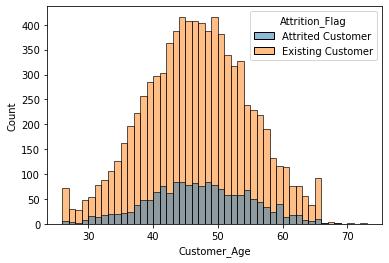

In [ ]:
sns.histplot(data=df,x="Customer_Age",hue="Attrition_Flag");

**Gender vs Attrition_Flag**

Attrition_Flag  Attrited Customer  Existing Customer    All
Gender                                                     
All                          1627               8500  10127
F                             930               4428   5358
M                             697               4072   4769
------------------------------------------------------------------------------------------------------------------------


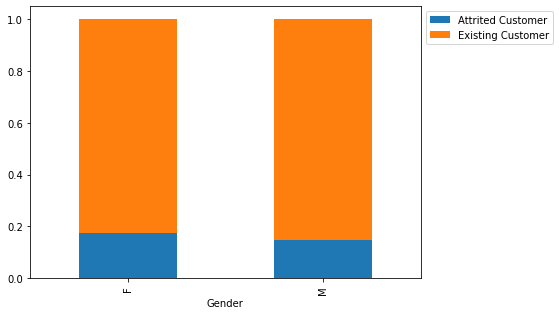

In [ ]:
stacked_barplot(df, "Gender" ,"Attrition_Flag")

**Dependent_Count vs Attrition_Flag**

Attrition_Flag   Attrited Customer  Existing Customer    All
Dependent_count                                             
All                           1627               8500  10127
3                              482               2250   2732
2                              417               2238   2655
1                              269               1569   1838
4                              260               1314   1574
0                              135                769    904
5                               64                360    424
------------------------------------------------------------------------------------------------------------------------


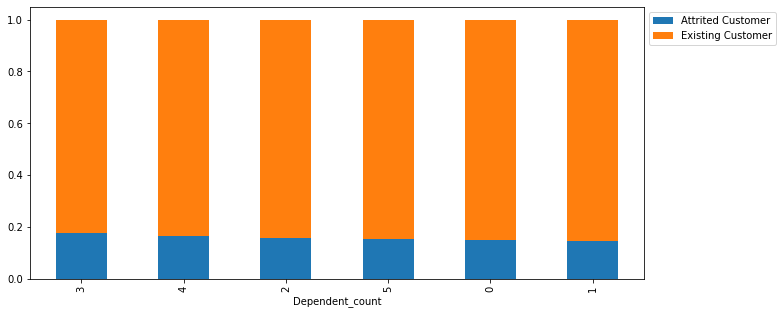

In [ ]:
stacked_barplot(df, "Dependent_count" ,"Attrition_Flag")

**Education_Level vs Attrition_Flag**

Attrition_Flag   Attrited Customer  Existing Customer   All
Education_Level                                            
All                           1371               7237  8608
Graduate                       487               2641  3128
High School                    306               1707  2013
Uneducated                     237               1250  1487
College                        154                859  1013
Doctorate                       95                356   451
Post-Graduate                   92                424   516
------------------------------------------------------------------------------------------------------------------------


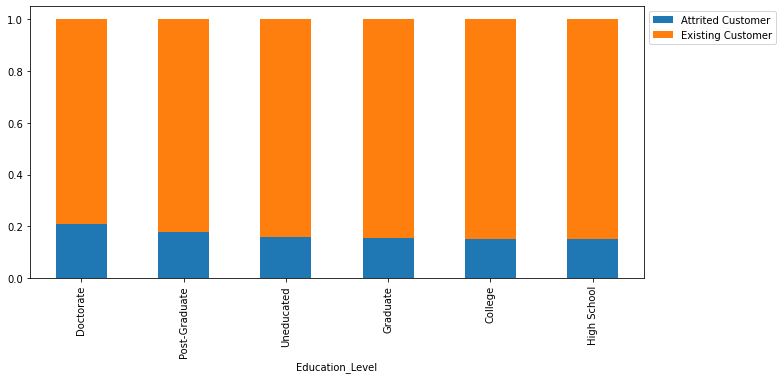

In [ ]:
stacked_barplot(df, "Education_Level" ,"Attrition_Flag")

**Marital_Status vs Attrition_Flag**

Attrition_Flag  Attrited Customer  Existing Customer   All
Marital_Status                                            
All                          1498               7880  9378
Married                       709               3978  4687
Single                        668               3275  3943
Divorced                      121                627   748
------------------------------------------------------------------------------------------------------------------------


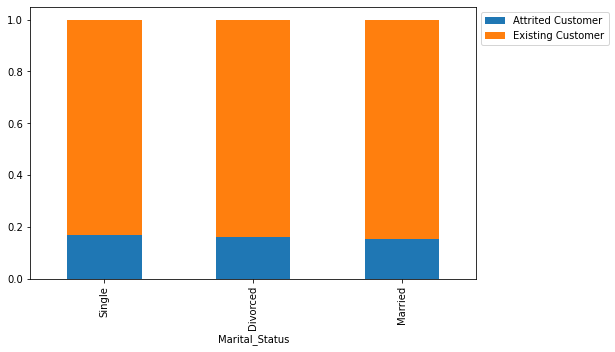

In [ ]:
stacked_barplot(df, "Marital_Status" ,"Attrition_Flag")

**Income_Category vs Attrition_Flag**

Attrition_Flag   Attrited Customer  Existing Customer   All
Income_Category                                            
All                           1440               7575  9015
Less than $40K                 612               2949  3561
$40K - $60K                    271               1519  1790
$80K - $120K                   242               1293  1535
$60K - $80K                    189               1213  1402
$120K +                        126                601   727
------------------------------------------------------------------------------------------------------------------------


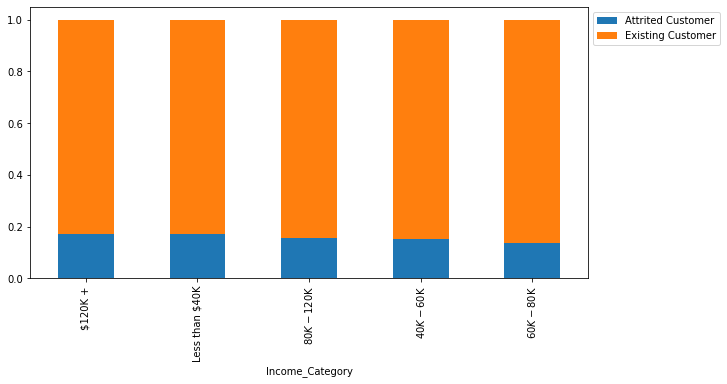

In [ ]:
stacked_barplot(df, "Income_Category" ,"Attrition_Flag")

**Card_Category vs Attrition_Flag**

Attrition_Flag  Attrited Customer  Existing Customer    All
Card_Category                                              
All                          1627               8500  10127
Blue                         1519               7917   9436
Silver                         82                473    555
Gold                           21                 95    116
Platinum                        5                 15     20
------------------------------------------------------------------------------------------------------------------------


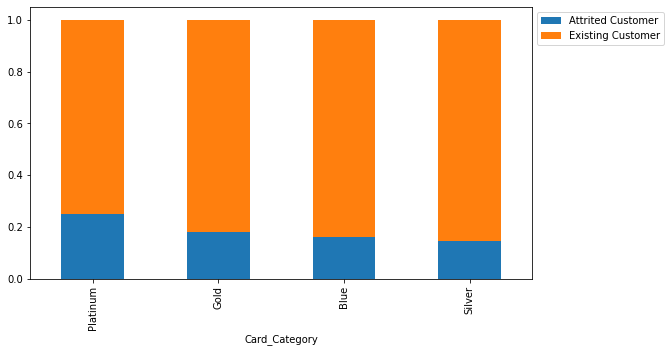

In [ ]:
stacked_barplot(df, "Card_Category" ,"Attrition_Flag")

**Months_on_book vs Attrition_Flag**

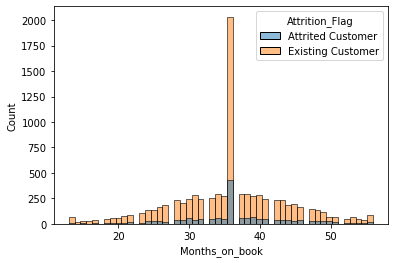

In [ ]:
sns.histplot(data=df,x="Months_on_book",hue="Attrition_Flag");

**Total_Relationship_Count vs Attrition_Flag**

Attrition_Flag            Attrited Customer  Existing Customer    All
Total_Relationship_Count                                             
All                                    1627               8500  10127
3                                       400               1905   2305
2                                       346                897   1243
1                                       233                677    910
5                                       227               1664   1891
4                                       225               1687   1912
6                                       196               1670   1866
------------------------------------------------------------------------------------------------------------------------


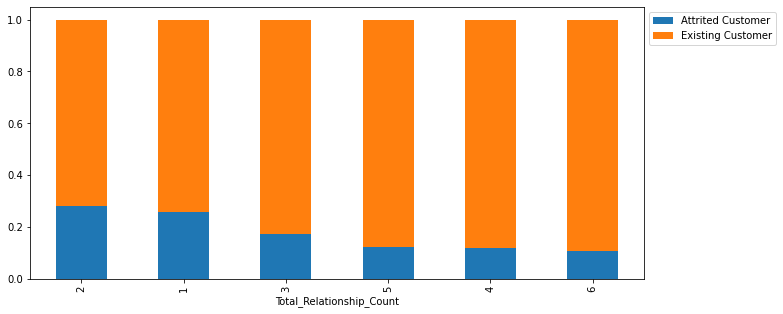

In [ ]:
stacked_barplot(df, "Total_Relationship_Count" ,"Attrition_Flag")

**Months_Inactive_12_mon vs Attrition_Flag**

Attrition_Flag          Attrited Customer  Existing Customer    All
Months_Inactive_12_mon                                             
All                                  1627               8500  10127
3                                     826               3020   3846
2                                     505               2777   3282
4                                     130                305    435
1                                     100               2133   2233
5                                      32                146    178
6                                      19                105    124
0                                      15                 14     29
------------------------------------------------------------------------------------------------------------------------


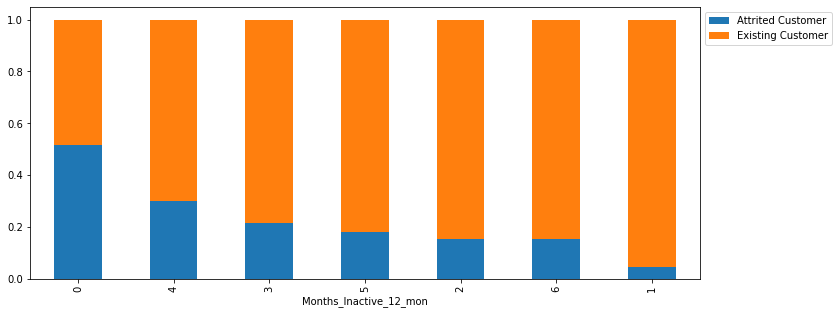

In [ ]:
stacked_barplot(df, "Months_Inactive_12_mon" ,"Attrition_Flag")

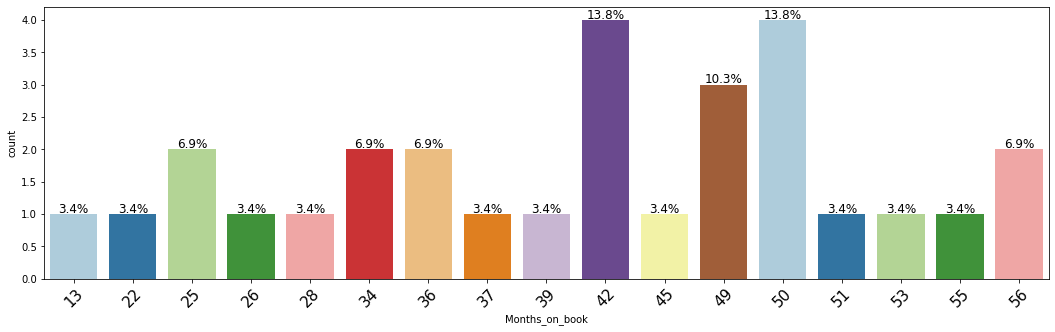

In [ ]:
labeled_barplot(df[df['Months_Inactive_12_mon']==0], "Months_on_book", perc=True)

In [ ]:
df[df['Months_Inactive_12_mon']==0]['Months_on_book'].mean()

40.89655172413793

If we take a look at Months_on_book for those data points where the the Months_Inactive_12_mon == 0, it is not the case that new customers have churned. The average period of relationship of those customers is around 40 months. So, even after maintaining 40 months of relationship with the bank and being active for almost all the months 15 customers have churned.

**Contacts_Count_12_mon vs Attrition_Flag**

Attrition_Flag         Attrited Customer  Existing Customer    All
Contacts_Count_12_mon                                             
All                                 1627               8500  10127
3                                    681               2699   3380
2                                    403               2824   3227
4                                    315               1077   1392
1                                    108               1391   1499
5                                     59                117    176
6                                     54                  0     54
0                                      7                392    399
------------------------------------------------------------------------------------------------------------------------


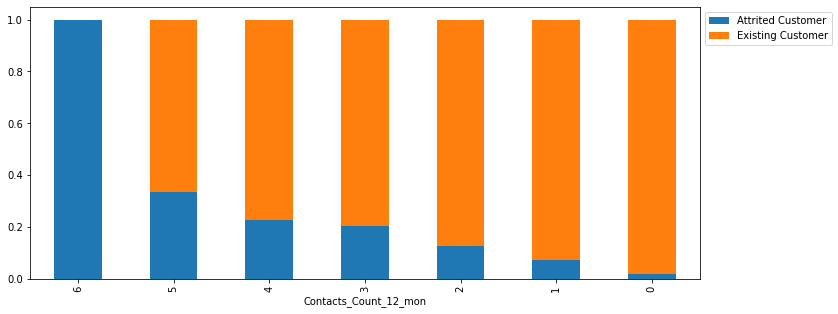

In [ ]:
stacked_barplot(df, "Contacts_Count_12_mon" ,"Attrition_Flag")

**Credit_Limit vs Attrition_Flag**

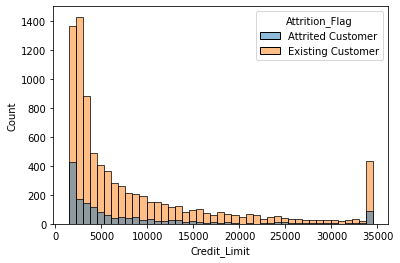

In [ ]:
sns.histplot(data=df,x="Credit_Limit",hue="Attrition_Flag");

**Total_Revolving_Bal vs Attrition_Flag**

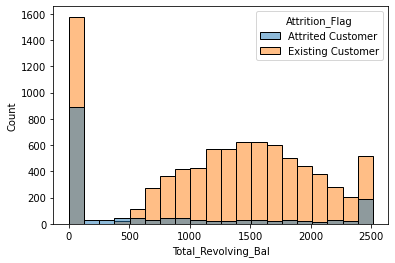

In [ ]:
sns.histplot(data=df,x="Total_Revolving_Bal",hue="Attrition_Flag");

**Avg_Open_To_Buy vs Attrition_Flag**

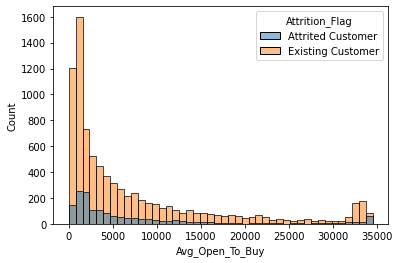

In [ ]:
sns.histplot(data=df,x="Avg_Open_To_Buy",hue="Attrition_Flag");

In [ ]:
df1 = df[df['Avg_Open_To_Buy'] < 5000]

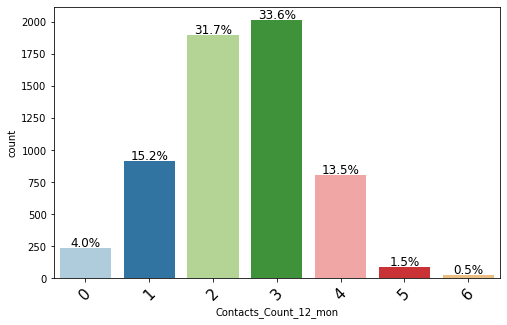

In [ ]:
labeled_barplot(df1, "Contacts_Count_12_mon", perc=True)

More customers who had less amount left on the credit card to use have churned. May be those customers wanted more credit limit and made contacts with the bank and were not satisfied and hence churned. Taking a look at the data of those customers who had less than 5000 left on their credit card, most of these customers have made contact with the bank atleast once. The maximum number of contacts in this case is 3 with around 2000 customers.

**Total_Amt_Chng_Q4_Q1**

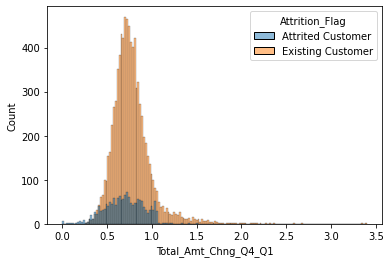

In [ ]:
sns.histplot(data=df,x="Total_Amt_Chng_Q4_Q1",hue="Attrition_Flag");

**Total_Trans_Amt vs Attrition_Flag**

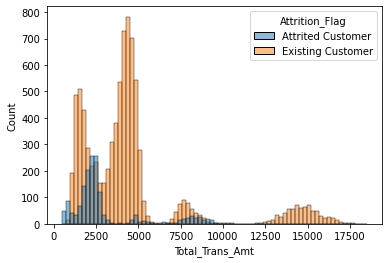

In [ ]:
sns.histplot(data=df,x="Total_Trans_Amt",hue="Attrition_Flag");

The datapoints on the far right, with high transaction amount did not churn

**Total_Trans_Ct vs Attrition_Flag**

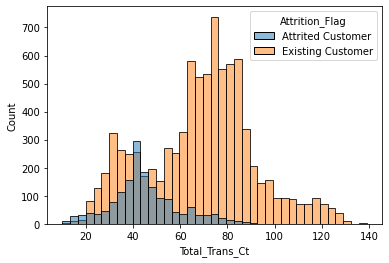

In [ ]:
sns.histplot(data=df,x="Total_Trans_Ct",hue="Attrition_Flag");

Customers with high number of transactions did not churn

**Total_Ct_Chng_Q4_Q1 vs Attrition_Flag**

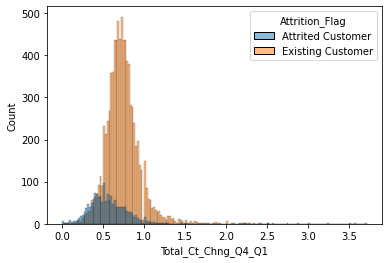

In [ ]:
sns.histplot(data=df,x="Total_Ct_Chng_Q4_Q1",hue="Attrition_Flag");

**Avg_Utilization_Ratio vs Attrition_Flag**

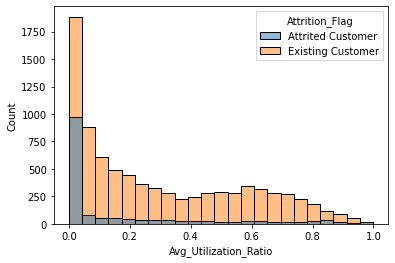

In [ ]:
sns.histplot(data=df,x="Avg_Utilization_Ratio",hue="Attrition_Flag");

**Bi-variate Analysis Insights:**

* People in the age group 40 to 50 have churned the most.
* While considering the number of churns between Male and Female, more Female customers have churned but taking a look at the ratio – the ratio remains the same for both male and female who have churned.
* People who have 3 and 2 dependents have churned the most but with the ratio – the ratio is more or less the same for all levels of this column.
Considering the ratio – people with Doctorate have churned the most – more than ~20%.
* When Income_category is considered, most people who have the income level less than $40k have churned the most but the ratio seems to be almost the same for all the levels.
* 25% (5/20) of customers who use Platinum cards have churned.
* The number of people who have maintained 36 months of relationship with the bank are more in this dataset so as the churns.
* The most churns in terms of ratio has come from the people who have 0 months of inactivity - ~50% (15/29) customers have churned. Very less number of churns have happened when the number of inactive months is 1.

* All the customers have churned when the number of contacts between bank and customer is 6. This is an interesting fact. This could be interpreted in many ways. The customers could have got annoyed with so many contacts and hence churned or Even after making so many contacts with the bank the customers concerns would have not been answered. The ratio falls down as the number of contacts go low, being very less when the contact is 0. It is safe to assume that this variable is going to have great importance interms of explaining the model.
* More People with less credit limit, less average utilization ratio and less Total revolving balance have churned.
* More customers who had less amount left on the credit card to use have churned. May be those customers wanted more credit limit and made contacts with the bank and were not satisfied and hence churned. Taking a look at the data of those customers who had less than 5000 left on their credit card, most of these customers have made contact with the bank atleast once. The maximum number of contacts in this case is 3 with around 2000 customers.
* Most customers who had the ratio of the total transaction amount in 4th quarter and the total transaction amount in 1st quarter between 0.5 to 1 have churned the most.
* Those customers who had total transactions made above 12000 and who had high number of transactions did not churn. These could also be important features when building model.
* Most customers who had the ratio of the total transaction count in 4th quarter and the total transaction amount in 1st quarter between 0.25 to 0.75 have churned the most.


Let us see the datapoints for different card

In [ ]:
#Profile of Attrited Customer with Blue Card
df[(df['Card_Category']=='Blue') & (df['Attrition_Flag']=='Attrited Customer')].describe(include='all').T

count unique                top    freq     mean  \
Attrition_Flag               1519      1  Attrited Customer    1519      NaN   
Customer_Age             1519.000    NaN                NaN     NaN   46.662   
Gender                       1519      2                  F     890      NaN   
Dependent_count          1519.000  6.000              3.000 456.000      NaN   
Education_Level              1276      6           Graduate     450      NaN   
Marital_Status               1399      3            Married     674      NaN   
Income_Category              1343      5     Less than $40K     586      NaN   
Card_Category                1519      1               Blue    1519      NaN   
Months_on_book           1519.000    NaN                NaN     NaN   36.200   
Total_Relationship_Count 1519.000  6.000              3.000 386.000      NaN   
Months_Inactive_12_mon   1519.000  7.000              3.000 769.000      NaN   
Contacts_Count_12_mon    1519.000  7.000              3.000 634.000      NaN   
Credit_Limit             1519.000    NaN                NaN     NaN 6817.747   
Total_Revolving_Bal      1519.000    NaN                NaN     NaN  669.036   
Avg_Open_To_Buy          1519.000    NaN                NaN     NaN 6148.712   
Total_Amt_Chng_Q4_Q1     1519.000    NaN                NaN     NaN    0.692   
Total_Trans_Amt          1519.000    NaN                NaN     NaN 2954.165   
Total_Trans_Ct           1519.000    NaN                NaN     NaN   44.226   
Total_Ct_Chng_Q4_Q1      1519.000    NaN                NaN     NaN    0.550   
Avg_Utilization_Ratio    1519.000    NaN                NaN     NaN    0.172   
Agebin                       1519      5              46-55     634      NaN   

                              std      min      25%      50%      75%  \
Attrition_Flag                NaN      NaN      NaN      NaN      NaN   
Customer_Age                7.698   26.000   41.000   47.000   52.000   
Gender                        NaN      NaN      NaN      NaN      NaN   
Dependent_count               NaN      NaN      NaN      NaN      NaN   
Education_Level               NaN      NaN      NaN      NaN      NaN   
Marital_Status                NaN      NaN      NaN      NaN      NaN   
Income_Category               NaN      NaN      NaN      NaN      NaN   
Card_Category                 NaN      NaN      NaN      NaN      NaN   
Months_on_book              7.830   13.000   32.000   36.000   40.000   
Total_Relationship_Count      NaN      NaN      NaN      NaN      NaN   
Months_Inactive_12_mon        NaN      NaN      NaN      NaN      NaN   
Contacts_Count_12_mon         NaN      NaN      NaN      NaN      NaN   
Credit_Limit             7470.188 1438.300 2004.500 3841.000 8313.500   
Total_Revolving_Bal       922.333    0.000    0.000    0.000 1303.500   
Avg_Open_To_Buy          7500.487    3.000 1520.500 3157.000 7571.500   
Total_Amt_Chng_Q4_Q1        0.213    0.000    0.544    0.698    0.853   
Total_Trans_Amt          2180.365  510.000 1896.000 2314.000 2709.000   
Total_Trans_Ct             14.138   10.000   37.000   43.000   50.500   
Total_Ct_Chng_Q4_Q1         0.226    0.000    0.400    0.524    0.687   
Avg_Utilization_Ratio       0.271    0.000    0.000    0.000    0.262   
Agebin                        NaN      NaN      NaN      NaN      NaN   

                               max  
Attrition_Flag                 NaN  
Customer_Age                68.000  
Gender                         NaN  
Dependent_count                NaN  
Education_Level                NaN  
Marital_Status                 NaN  
Income_Category                NaN  
Card_Category                  NaN  
Months_on_book              56.000  
Total_Relationship_Count       NaN  
Months_Inactive_12_mon         NaN  
Contacts_Count_12_mon          NaN  
Credit_Limit             34516.000  
Total_Revolving_Bal       2517.000  
Avg_Open_To_Buy          34516.000  
Total_Amt_Chng_Q4_Q1         1.411  
Total_Trans_Amt          10583.

In [ ]:
#Profile of Attrited Customer with Gold Card
df[(df['Card_Category']=='Gold') & (df['Attrition_Flag']=='Attrited Customer')].describe(include='all').T

count unique                top   freq      mean  \
Attrition_Flag               21      1  Attrited Customer     21       NaN   
Customer_Age             21.000    NaN                NaN    NaN    43.857   
Gender                       21      2                  M     13       NaN   
Dependent_count          21.000  6.000              2.000  7.000       NaN   
Education_Level              17      6           Graduate      6       NaN   
Marital_Status               17      2             Single     11       NaN   
Income_Category              19      5        $60K - $80K      6       NaN   
Card_Category                21      1               Gold     21       NaN   
Months_on_book           21.000    NaN                NaN    NaN    33.905   
Total_Relationship_Count 21.000  6.000              2.000  8.000       NaN   
Months_Inactive_12_mon   21.000  3.000              3.000 14.000       NaN   
Contacts_Count_12_mon    21.000  6.000              3.000  8.000       NaN   
Credit_Limit             21.000    NaN                NaN    NaN 29878.524   
Total_Revolving_Bal      21.000    NaN                NaN    NaN  1027.000   
Avg_Open_To_Buy          21.000    NaN                NaN    NaN 28851.524   
Total_Amt_Chng_Q4_Q1     21.000    NaN                NaN    NaN     0.770   
Total_Trans_Amt          21.000    NaN                NaN    NaN  5841.810   
Total_Trans_Ct           21.000    NaN                NaN    NaN    59.857   
Total_Ct_Chng_Q4_Q1      21.000    NaN                NaN    NaN     0.619   
Avg_Utilization_Ratio    21.000    NaN                NaN    NaN     0.036   
Agebin                       21      4              36-45      9       NaN   

                              std       min       25%       50%       75%  \
Attrition_Flag                NaN       NaN       NaN       NaN       NaN   
Customer_Age                6.223    32.000    41.000    44.000    47.000   
Gender                        NaN       NaN       NaN       NaN       NaN   
Dependent_count               NaN       NaN       NaN       NaN       NaN   
Education_Level               NaN       NaN       NaN       NaN       NaN   
Marital_Status                NaN       NaN       NaN       NaN       NaN   
Income_Category               NaN       NaN       NaN       NaN       NaN   
Card_Category                 NaN       NaN       NaN       NaN       NaN   
Months_on_book              6.156    20.000    32.000    36.000    36.000   
Total_Relationship_Count      NaN       NaN       NaN       NaN       NaN   
Months_Inactive_12_mon        NaN       NaN       NaN       NaN       NaN   
Contacts_Count_12_mon         NaN       NaN       NaN       NaN       NaN   
Credit_Limit             7832.307 15109.000 23981.000 34516.000 34516.000   
Total_Revolving_Bal      1009.462     0.000     0.000   897.000  1847.000   
Avg_Open_To_Buy          7757.525 13640.000 23981.000 32315.000 34516.000   
Total_Amt_Chng_Q4_Q1        0.256     0.196     0.591     0.858     0.978   
Total_Trans_Amt          2836.813  1727.000  2315.000  6782.000  8356.000   
Total_Trans_Ct             14.402    34.000    47.000    64.000    68.000   
Total_Ct_Chng_Q4_Q1         0.201     0.214     0.478     0.650     0.750   
Avg_Utilization_Ratio       0.035     0.000     0.000     0.032     0.064   
Agebin                        NaN       NaN       NaN       NaN       NaN   

                               max  
Attrition_Flag                 NaN  
Customer_Age                59.000  
Gender                         NaN  
Dependent_count                NaN  
Education_Level                NaN  
Marital_Status                 NaN  
Income_Category                NaN  
Card_Category                  NaN  
Months_on_book              48.000  
Total_Relationship_Count       NaN  
Months_Inactive_12_mon         NaN  
Contacts_Count_12_mon          NaN  
Credit_Limit             34516.000  
Total_Revolving_Bal       2517.000  
Avg_Open_To_Buy          34516.000  
Total_Amt_Chng_Q4_Q1  

In [ ]:
#Profile of Attrited Customer with Silver Card
df[(df['Card_Category']=='Silver') & (df['Attrition_Flag']=='Attrited Customer')].describe(include='all').T

count unique                top   freq      mean  \
Attrition_Flag               82      1  Attrited Customer     82       NaN   
Customer_Age             82.000    NaN                NaN    NaN    47.159   
Gender                       82      2                  M     54       NaN   
Dependent_count          82.000  6.000              2.000 23.000       NaN   
Education_Level              73      6           Graduate     28       NaN   
Marital_Status               77      3             Single     43       NaN   
Income_Category              75      5       $80K - $120K     22       NaN   
Card_Category                82      1             Silver     82       NaN   
Months_on_book           82.000    NaN                NaN    NaN    36.366   
Total_Relationship_Count 82.000  6.000              2.000 23.000       NaN   
Months_Inactive_12_mon   82.000  6.000              3.000 40.000       NaN   
Contacts_Count_12_mon    82.000  6.000              3.000 37.000       NaN   
Credit_Limit             82.000    NaN                NaN    NaN 25960.268   
Total_Revolving_Bal      82.000    NaN                NaN    NaN   677.244   
Avg_Open_To_Buy          82.000    NaN                NaN    NaN 25283.024   
Total_Amt_Chng_Q4_Q1     82.000    NaN                NaN    NaN     0.706   
Total_Trans_Amt          82.000    NaN                NaN    NaN  4899.683   
Total_Trans_Ct           82.000    NaN                NaN    NaN    53.280   
Total_Ct_Chng_Q4_Q1      82.000    NaN                NaN    NaN     0.613   
Avg_Utilization_Ratio    82.000    NaN                NaN    NaN     0.032   
Agebin                       82      4              46-55     42       NaN   

                               std      min       25%       50%       75%  \
Attrition_Flag                 NaN      NaN       NaN       NaN       NaN   
Customer_Age                 7.471   30.000    42.250    48.000    52.000   
Gender                         NaN      NaN       NaN       NaN       NaN   
Dependent_count                NaN      NaN       NaN       NaN       NaN   
Education_Level                NaN      NaN       NaN       NaN       NaN   
Marital_Status                 NaN      NaN       NaN       NaN       NaN   
Income_Category                NaN      NaN       NaN       NaN       NaN   
Card_Category                  NaN      NaN       NaN       NaN       NaN   
Months_on_book               7.721   18.000    33.000    36.000    42.750   
Total_Relationship_Count       NaN      NaN       NaN       NaN       NaN   
Months_Inactive_12_mon         NaN      NaN       NaN       NaN       NaN   
Contacts_Count_12_mon          NaN      NaN       NaN       NaN       NaN   
Credit_Limit             10054.778 3735.000 14890.000 33092.000 34516.000   
Total_Revolving_Bal        894.665    0.000     0.000   184.000  1267.750   
Avg_Open_To_Buy          10072.892 3735.000 14023.750 31999.000 34116.750   
Total_Amt_Chng_Q4_Q1         0.244    0.000     0.552     0.734     0.877   
Total_Trans_Amt           3140.824  691.000  1929.500  4753.000  8144.000   
Total_Trans_Ct              17.497   14.000    41.000    50.500    68.750   
Total_Ct_Chng_Q4_Q1          0.249    0.000     0.435     0.591     0.783   
Avg_Utilization_Ratio        0.052    0.000     0.000     0.005     0.053   
Agebin                         NaN      NaN       NaN       NaN       NaN   

                               max  
Attrition_Flag                 NaN  
Customer_Age                65.000  
Gender                         NaN  
Dependent_count                NaN  
Education_Level                NaN  
Marital_Status                 NaN  
Income_Category                NaN  
Card_Category                  NaN  
Months_on_book              56.000  
Total_Relationship_Count       NaN  
Months_Inactive_12_mon         NaN  
Contacts_Count_12_mon          NaN  
Credit_Limit             34516.000  
Total_Revolving_Bal       2517.000  
Avg_Open_To_Buy          34516.000  
Total_Amt_Chng_Q4_Q1  

In [ ]:
#Profile of Attrited Customer with Platinum Card
df[(df['Card_Category']=='Platinum') & (df['Attrition_Flag']=='Attrited Customer')].describe(include='all').T

count unique                top  freq      mean  \
Attrition_Flag               5      1  Attrited Customer     5       NaN   
Customer_Age             5.000    NaN                NaN   NaN    49.400   
Gender                       5      2                  F     4       NaN   
Dependent_count          5.000  4.000              2.000 2.000       NaN   
Education_Level              5      3           Graduate     3       NaN   
Marital_Status               5      2             Single     3       NaN   
Income_Category              3      2     Less than $40K     2       NaN   
Card_Category                5      1           Platinum     5       NaN   
Months_on_book           5.000    NaN                NaN   NaN    36.000   
Total_Relationship_Count 5.000  3.000              2.000 3.000       NaN   
Months_Inactive_12_mon   5.000  2.000              3.000 3.000       NaN   
Contacts_Count_12_mon    5.000  3.000              3.000 2.000       NaN   
Credit_Limit             5.000    NaN                NaN   NaN 24997.400   
Total_Revolving_Bal      5.000    NaN                NaN   NaN   263.400   
Avg_Open_To_Buy          5.000    NaN                NaN   NaN 24734.000   
Total_Amt_Chng_Q4_Q1     5.000    NaN                NaN   NaN     0.785   
Total_Trans_Amt          5.000    NaN                NaN   NaN  4755.800   
Total_Trans_Ct           5.000    NaN                NaN   NaN    60.200   
Total_Ct_Chng_Q4_Q1      5.000    NaN                NaN   NaN     0.546   
Avg_Utilization_Ratio    5.000    NaN                NaN   NaN     0.010   
Agebin                       5      2              46-55     4       NaN   

                              std       min       25%       50%       75%  \
Attrition_Flag                NaN       NaN       NaN       NaN       NaN   
Customer_Age                4.159    43.000    48.000    51.000    51.000   
Gender                        NaN       NaN       NaN       NaN       NaN   
Dependent_count               NaN       NaN       NaN       NaN       NaN   
Education_Level               NaN       NaN       NaN       NaN       NaN   
Marital_Status                NaN       NaN       NaN       NaN       NaN   
Income_Category               NaN       NaN       NaN       NaN       NaN   
Card_Category                 NaN       NaN       NaN       NaN       NaN   
Months_on_book              4.528    31.000    32.000    37.000    38.000   
Total_Relationship_Count      NaN       NaN       NaN       NaN       NaN   
Months_Inactive_12_mon        NaN       NaN       NaN       NaN       NaN   
Contacts_Count_12_mon         NaN       NaN       NaN       NaN       NaN   
Credit_Limit             9281.907 15987.000 15987.000 23981.000 34516.000   
Total_Revolving_Bal       284.588     0.000     0.000   193.000   531.000   
Avg_Open_To_Buy          9212.951 15794.000 15987.000 23388.000 33985.000   
Total_Amt_Chng_Q4_Q1        0.230     0.435     0.695     0.827     0.980   
Total_Trans_Amt          2073.953  2021.000  3901.000  4758.000  5418.000   
Total_Trans_Ct             10.035    46.000    54.000    65.000    65.000   
Total_Ct_Chng_Q4_Q1         0.148     0.394     0.421     0.512     0.690   
Avg_Utilization_Ratio       0.011     0.000     0.000     0.012     0.015   
Agebin                        NaN       NaN       NaN       NaN       NaN   

                               max  
Attrition_Flag                 NaN  
Customer_Age                54.000  
Gender                         NaN  
Dependent_count                NaN  
Education_Level                NaN  
Marital_Status                 NaN  
Income_Category                NaN  
Card_Category                  NaN  
Months_on_book              42.000  
Total_Relationship_Count       NaN  
Months_Inactive_12_mon         NaN  
Contacts_Count_12_mon          NaN  
Credit_Limit             34516.000  
Total_Revolving_Bal        593.000  
Avg_Open_To_Buy          34516.000  
Total_Amt_Chng_Q4_Q1         0.987  
Total_Trans_Amt           76

* Customers who had blue card and churned were mostly of:
  * Female
  * Graduate
  * Married
  * Had a salary of less than $40K

  * On an average, had around 36 months of relationship with the bank
  * Had an average credit limit of around 6817
* Customers who had gold card and churned were mostly of:
  * Male
  * Graduate
  * Single
  * Had a salary of $60K - 80K

  * On an average, had around 33 months of relationship with the bank
  * Had an average credit limit of around 29878
* Customers who had silver card and churned were mostly of:
  * Male
  * Graduate
  * Single
  * Had a salary of $80K - 120K

  * On an average, had around 36 months of relationship with the bank
  * Had an average credit limit of around 25960
* Customers who had platinum card and churned were mostly of:
  * Female
  * Graduate
  * Single
  * Had a salary of less than $40K

  * On an average, had around 36 months of relationship with the bank
  * Had an average credit limit of around 24997


### Multi-Variate Analysis

In [ ]:
def plot_corr(df, size=10):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns,rotation = 45)
    plt.yticks(range(len(corr.columns)), corr.columns)
    for (i, j), z in np.ndenumerate(corr):
        ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

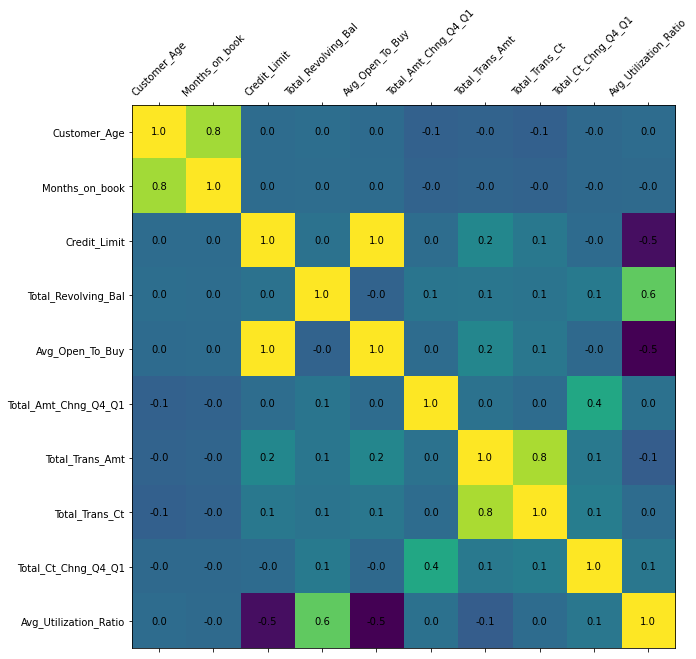

In [ ]:
plot_corr(df)

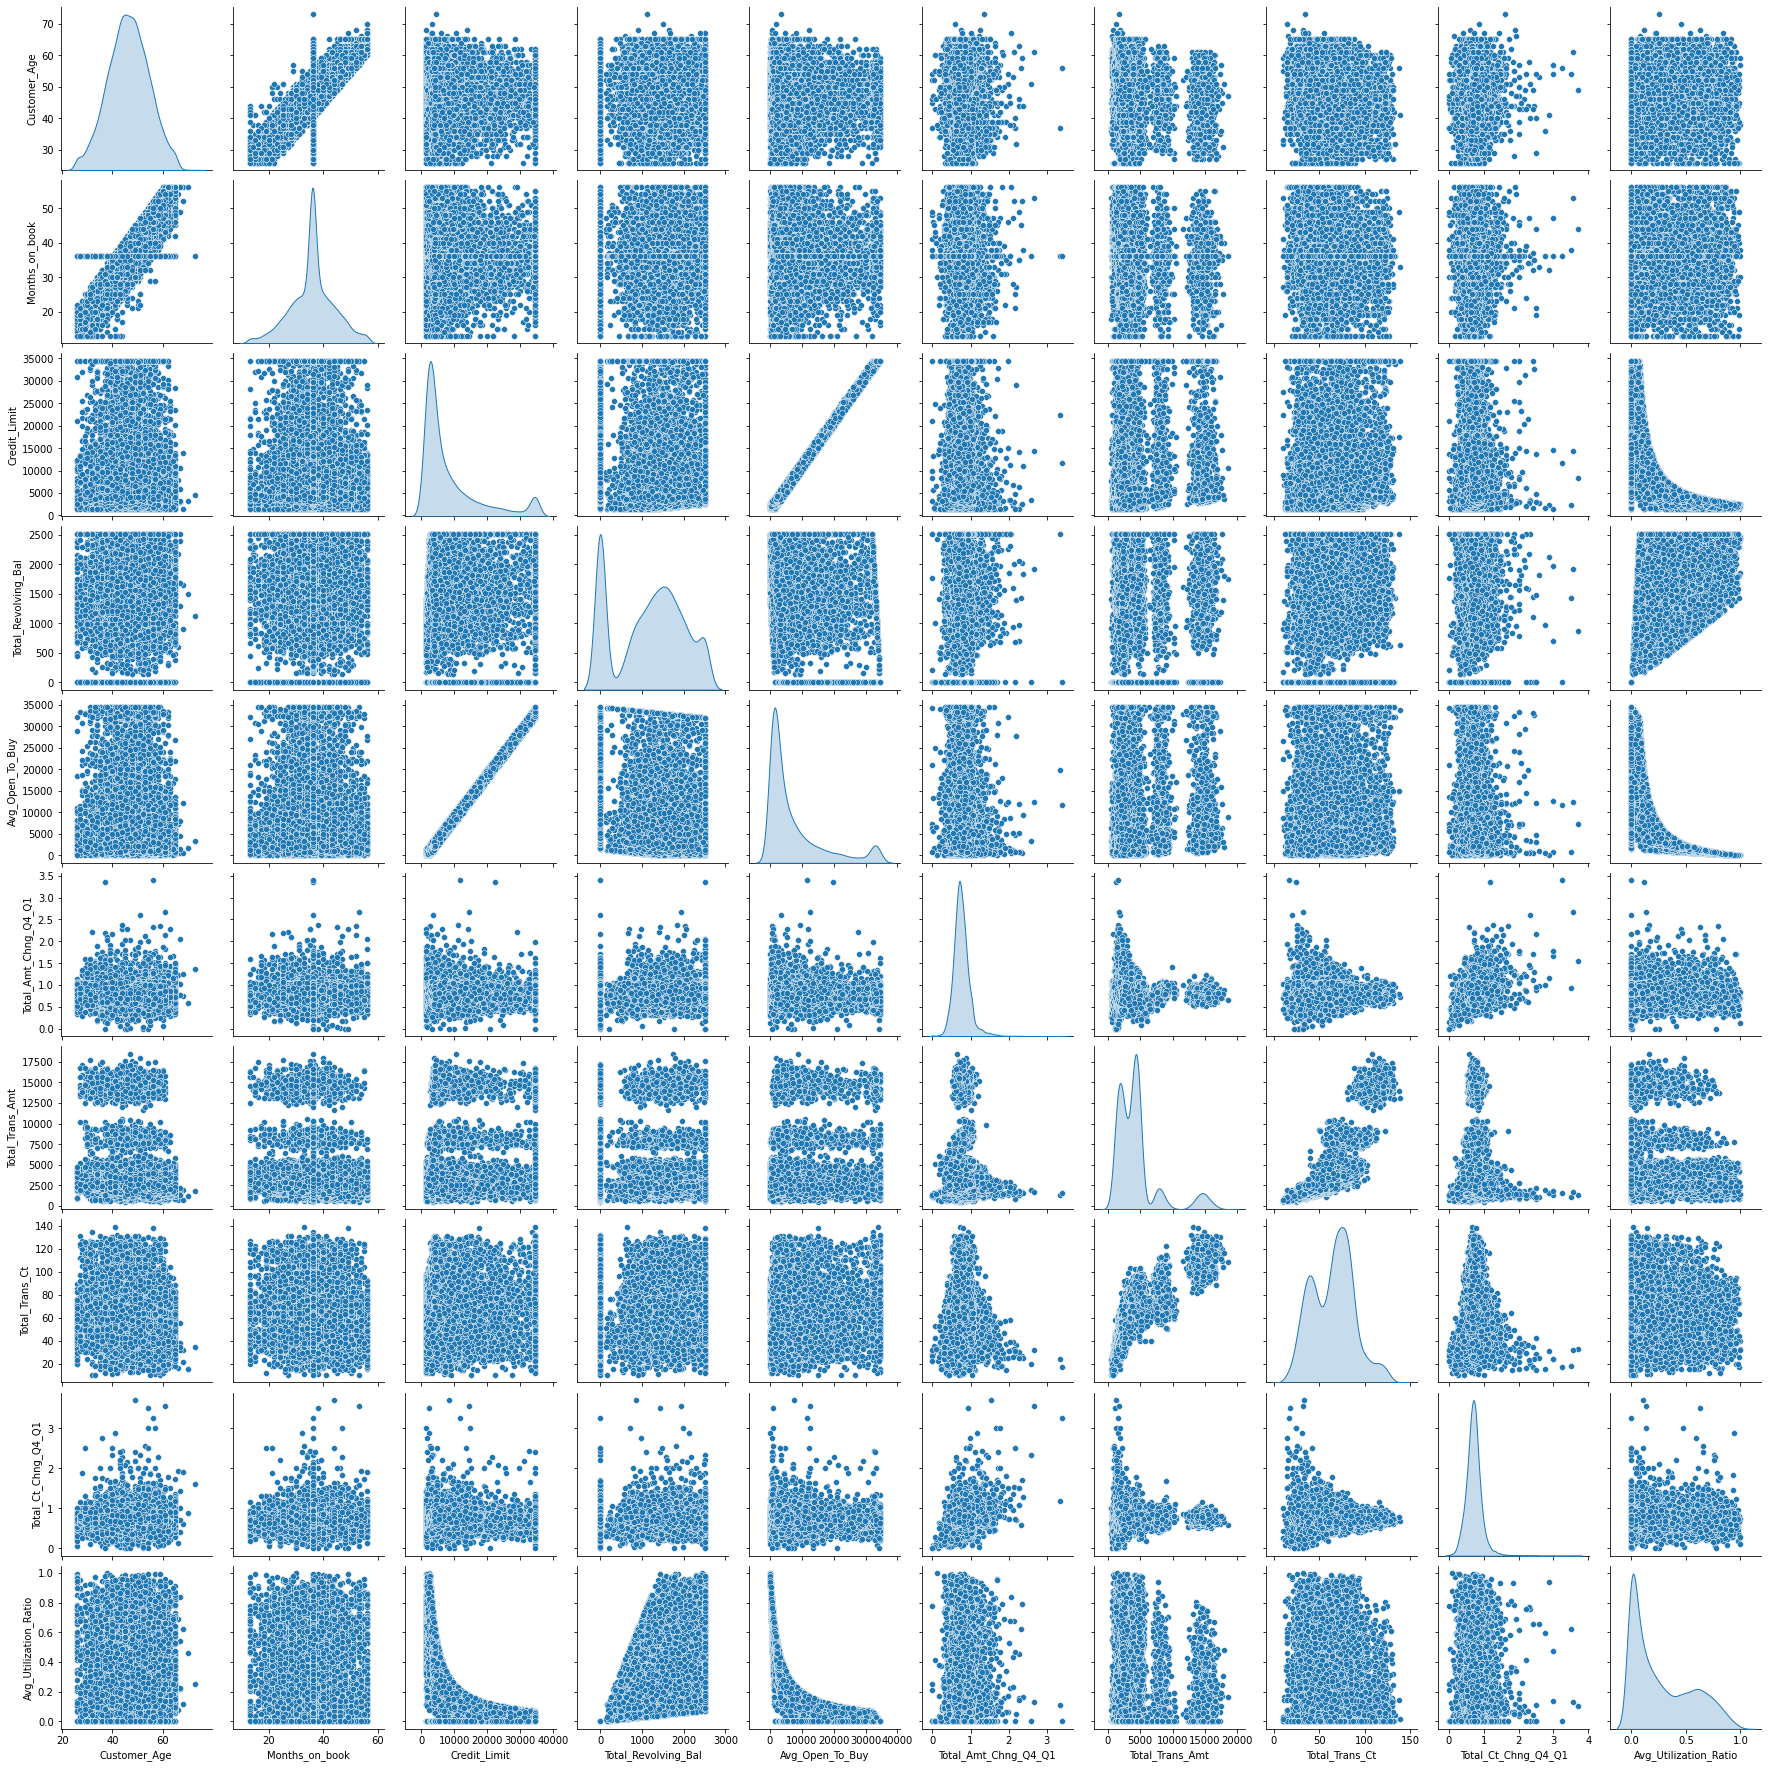

In [ ]:
sns.pairplot(df,diag_kind='kde');

Taking a look at the multi-variate analysis, many variables have high correlation.

* The variables Customer_Age and Months_on_book have high positive correlation of 0.8
* The variables Avg_Open_To_Buy and Credit_Limit have perfect positive correlation of 1.
* The Avg_Utilization_Ratio has a negative correlation of 0.5 with Credit_Limit and Avg_Open_To_Buy.
* The Avg_Utilization_Ratio has high positive correlation of 0.6 with Total_Revolving_Bal
* Total_Trans_Ct has a high positive correlation of 0.8 with Total_Trans_Amt

Since the variables Avg_Open_To_Buy has perfect positive correlation with Credit_Limit, we would want to have only one of these variables and remove the other before building models.

## Outliers Treatment



From our previous univariate analysis we saw outliers on the following variables:

* Customer_Age
* Months_on_book
* Credit_Limit
* Avg_Open_To_Buy
* Total_Amt_Chng_Q4_Q1
* Total_Trans_Amt
* Total_Trans_Ct
* Total_Ct_Chng_Q4_Q1

Let us examine these variables further to see if they need to be treated.

In [ ]:
Q1 = df['Customer_Age'].quantile(0.25)  # 25th quantile
Q3 = df['Customer_Age'].quantile(0.75)  # 75th quantile
IQR = Q3 - Q1
Lower_Whisker = Q1 - 1.5 * IQR
Upper_Whisker = Q3 + 1.5 * IQR
print("Number of Outliers = ",df[df['Customer_Age']>Upper_Whisker]['Customer_Age'].count())

Number of Outliers =  2


In [ ]:
outlier_variables = ['Customer_Age','Months_on_book','Credit_Limit','Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1','Total_Trans_Amt','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1']

for col in outlier_variables:
  Q1 = df[col].quantile(0.25)  # 25th quantile
  Q3 = df[col].quantile(0.75)  # 75th quantile
  IQR = Q3 - Q1
  Lower_Whisker = Q1 - 1.5 * IQR
  Upper_Whisker = Q3 + 1.5 * IQR
  print(col)
  print("The Lower Whisker value for",col,"is = ",Lower_Whisker)
  print("Number of outliers below the lower whisker = ",df[df[col]<Lower_Whisker][col].count())
  print("The Upper Whisker value for",col, "is = ",Upper_Whisker)
  print("Number of outliers above the upper whisker = ",df[df[col]>Upper_Whisker][col].count())
  print("-"*50)

Customer_Age
The Lower Whisker value for Customer_Age is =  24.5
Number of outliers below the lower whisker =  0
The Upper Whisker value for Customer_Age is =  68.5
Number of outliers above the upper whisker =  2
--------------------------------------------------
Months_on_book
The Lower Whisker value for Months_on_book is =  17.5
Number of outliers below the lower whisker =  188
The Upper Whisker value for Months_on_book is =  53.5
Number of outliers above the upper whisker =  198
--------------------------------------------------
Credit_Limit
The Lower Whisker value for Credit_Limit is =  -10213.75
Number of outliers below the lower whisker =  0
The Upper Whisker value for Credit_Limit is =  23836.25
Number of outliers above the upper whisker =  984
--------------------------------------------------
Avg_Open_To_Buy
The Lower Whisker value for Avg_Open_To_Buy is =  -11477.25
Number of outliers below the lower whisker =  0
The Upper Whisker value for Avg_Open_To_Buy is =  22660.75
Numb

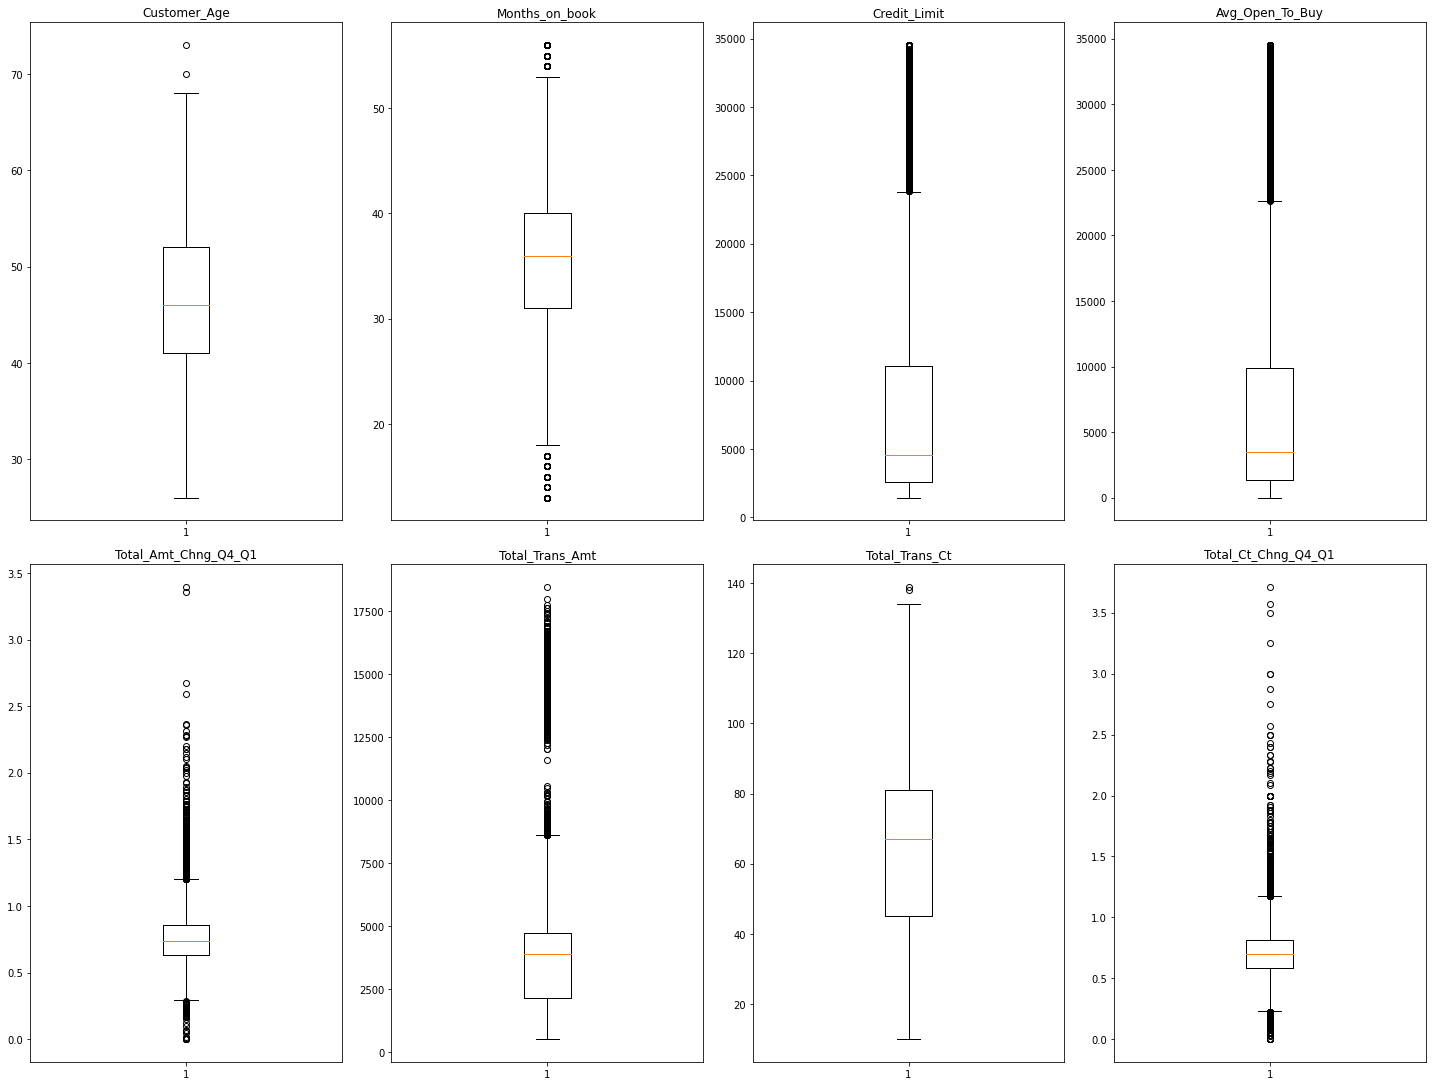

In [ ]:
plt.figure(figsize=(20,30))

for i, col in enumerate(outlier_variables):
    plt.subplot(4,4,i+1)
    plt.boxplot(df[col],whis=1.5)
    plt.tight_layout()
    plt.title(col)
plt.show()

The columns Credit_Limit, Avg_Open_To_Buy, Total_Trans_Amt have the most number of outliers. We have already examined these data points in the univariate analysis and concluded that all these values are possible. Hence no need to treat the outliers.

## Missing Value Treatment:

In [ ]:
df.isnull().sum()

Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category             1112
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
Agebin                         0
dtype: int64

We have missing values in the variables:
* Education_level
* Marital_Status
* Income_Category

We will impute them with simple imputer with strategy "most_frequent"

In [ ]:
# df = data

In [ ]:
reqd_col_for_impute = ['Income_Category','Education_Level','Marital_Status']

### Data Preparation for Modeling

In [ ]:
# df = df1

In [ ]:
X = df.drop(['Agebin','Attrition_Flag','Avg_Open_To_Buy'],axis=1)

y = df["Attrition_Flag"].apply(lambda x: 1 if x == "Attrited Customer" else 0)

In [ ]:
# Splitting data into training, validation and test set:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(6075, 18) (2026, 18) (2026, 18)


In [ ]:
# Checking that no column has missing values in train, validation or test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_val.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

Customer_Age                  0
Gender                        0
Dependent_count               0
Education_Level             928
Marital_Status              457
Income_Category             654
Card_Category                 0
Months_on_book                0
Total_Relationship_Count      0
Months_Inactive_12_mon        0
Contacts_Count_12_mon         0
Credit_Limit                  0
Total_Revolving_Bal           0
Total_Amt_Chng_Q4_Q1          0
Total_Trans_Amt               0
Total_Trans_Ct                0
Total_Ct_Chng_Q4_Q1           0
Avg_Utilization_Ratio         0
dtype: int64
------------------------------
Customer_Age                  0
Gender                        0
Dependent_count               0
Education_Level             294
Marital_Status              140
Income_Category             221
Card_Category                 0
Months_on_book                0
Total_Relationship_Count      0
Months_Inactive_12_mon        0
Contacts_Count_12_mon         0
Credit_Limit                

In [ ]:
# df1 = df.copy()

In [ ]:
imputer1 = SimpleImputer(missing_values=np.nan, strategy="most_frequent")

In [ ]:

# Fit and transform the train data
X_train[reqd_col_for_impute] = imputer1.fit_transform(X_train[reqd_col_for_impute])

# Transform the validation data
X_val[reqd_col_for_impute] = imputer1.transform(X_val[reqd_col_for_impute])

# Transform the test data
X_test[reqd_col_for_impute] = imputer1.transform(X_test[reqd_col_for_impute])

In [ ]:
# Checking that no column has missing values in train, validation or test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_val.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64
------------------------------
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Total_Amt_Chng_Q4_Q1      

We have now treated all the missing values.

## Building the Model

**Model Evaluation Criterion:**

Before Model Building, let us focus on what performance parameter we should focus on - so that we can try to optimize the model based on that performance parameter.

In our case,

**False Positives**: We predict a customer would churn, but in reality he/she does not churn.

**False Negatives**: We predict a customer would not churn, but in reality he/she churns.

In our case, if we predict a customer would not churn but in reality the customer churns, we failed to predict it and the bank would not take the necessary steps to attract those customers. Therefore, we want less or zero False Negatives. Therefore, Recall has to be maximized.

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [ ]:
# defining a function to plot the confusion_matrix of a classification model built using sklearn
def confusion_matrix_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix, based on the threshold specified, with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    y_pred = np.round(pred_thres)

    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [ ]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[]

    #Predicting on train and tests
    pred_train = model.predict(X_train)
    pred_val = model.predict(X_val)

    #Accuracy of the model
    train_acc = model.score(X_train,y_train)
    val_acc = model.score(X_val,y_val)

    #Recall of the model
    train_recall = metrics.recall_score(y_train,pred_train)
    val_recall = metrics.recall_score(y_val,pred_val)

    #Precision of the model
    train_precision = metrics.precision_score(y_train,pred_train)
    val_precision = metrics.precision_score(y_val,pred_val)

    score_list.extend((train_acc,val_acc,train_recall,val_recall,train_precision,val_precision))

    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on validation set : ",model.score(X_val,y_val))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on validation set : ",metrics.recall_score(y_val,pred_val))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on validation set : ",metrics.precision_score(y_val,pred_val))

    return score_list # returning the list with train and test scores

We will build 6 models:
* Logistic Regression
* Decision Tree
* Bagging Classifier - default with decision tree
* Random Forest classifier
* Boosting - AdaBoost Boosting
* Boosting - Gradient Boosting


We will build the model based on the training set, do hyperparameter tuning based on validation set and build a pipeline for the testing set.

In [ ]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_val = pd.get_dummies(X_val, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
print(X_train.shape, X_val.shape, X_test.shape)

(6075, 46) (2026, 46) (2026, 46)


### Logistic Regression - default data

In [ ]:
# There are different solvers available in Sklearn logistic regression
# The newton-cg solver is faster for high-dimensional data

lr = LogisticRegression(solver="newton-cg", random_state=1)
lr.fit(X_train, y_train)

LogisticRegression(random_state=1, solver='newton-cg')

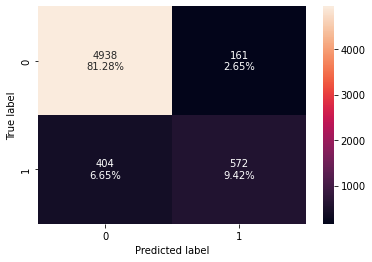

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn(lr, X_train, y_train)

In [ ]:
log_reg_model_train_perf = model_performance_classification_sklearn(
    lr, X_train, y_train
)
print("Training performance:")
log_reg_model_train_perf

Training performance:


Accuracy  Recall  Precision    F1
0     0.907   0.586      0.780 0.669

In [ ]:
# Calculating different metrics on validation set
log_reg_model_val_perf = model_performance_classification_sklearn(lr, X_val, y_val)
print("Validation performance:")
log_reg_model_val_perf

Validation performance:


Accuracy  Recall  Precision    F1
0     0.919   0.629      0.827 0.714

The model does not seem to overfit the data as we have similar Accuracy for both training and validation sets. The recall is also better for validation than on the training set.

### Decision Tree - default data

In [ ]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

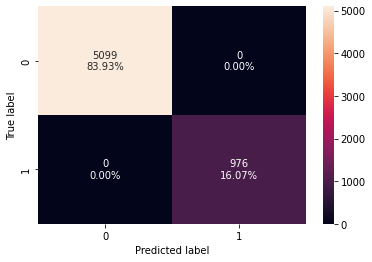

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn(dTree, X_train, y_train)

In [ ]:
#Calculating the performance on Training set
dTree_model_train_perf = model_performance_classification_sklearn(dTree, X_train, y_train)
print("Dtree Training performance:")
dTree_model_train_perf

Dtree Training performance:


Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000

In [ ]:
# Calculating different metrics on validation set
dTree_model_val_perf = model_performance_classification_sklearn(dTree, X_val, y_val)
print("dTree Validation performance:")
dTree_model_val_perf

dTree Validation performance:


Accuracy  Recall  Precision    F1
0     0.938   0.782      0.823 0.802

As ecpected, the model is overfitting the data - evident from the decrease in all the metrics. But this model has better recall compared to logistic regression

### Bagging Classifier - default with Decision Tree - default data

In [ ]:
#base_estimator for bagging classifier is a decision tree by default
bagging_estimator=BaggingClassifier(random_state=1)
bagging_estimator.fit(X_train,y_train)

BaggingClassifier(random_state=1)

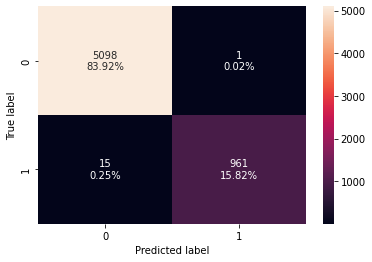

In [ ]:
confusion_matrix_sklearn(bagging_estimator, X_train, y_train)

In [ ]:
#Calculating the performance on Training set
bagging_estimator_model_train_perf = model_performance_classification_sklearn(bagging_estimator, X_train, y_train)
print("bagging_estimator Training performance:")
bagging_estimator_model_train_perf

bagging_estimator Training performance:


Accuracy  Recall  Precision    F1
0     0.997   0.985      0.999 0.992

In [ ]:
# Calculating different metrics on validation set
bagging_estimator_model_val_perf = model_performance_classification_sklearn(bagging_estimator, X_val, y_val)
print("bagging_estimator Validation performance:")
bagging_estimator_model_val_perf

bagging_estimator Validation performance:


Accuracy  Recall  Precision    F1
0     0.957   0.807      0.913 0.857

The Model still overfits but the recall value is much better compared to the previous 2 models.

### Random Forest Classifier - default data

In [ ]:
#Train the random forest classifier
rf_estimator=RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

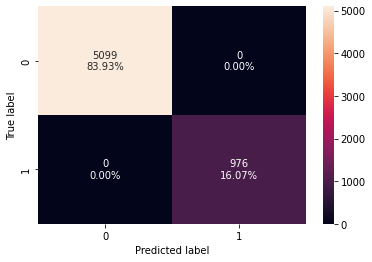

In [ ]:
confusion_matrix_sklearn(rf_estimator, X_train, y_train)

In [ ]:
#Calculating the performance on Training set
rf_estimator_model_train_perf = model_performance_classification_sklearn(rf_estimator, X_train, y_train)
print("rf_estimator Training performance:")
rf_estimator_model_train_perf

rf_estimator Training performance:


Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000

In [ ]:
# Calculating different metrics on validation set
rf_estimator_model_val_perf = model_performance_classification_sklearn(rf_estimator, X_val, y_val)
print("rf_estimator Validation performance:")
rf_estimator_model_val_perf

rf_estimator Validation performance:


Accuracy  Recall  Precision    F1
0     0.949   0.736      0.930 0.822

This model also overfits the data, and the recall value is not great.

### AdaBoosting - default data

In [ ]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
#To install xgboost library use - !pip install xgboost
from xgboost import XGBClassifier

In [ ]:
abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

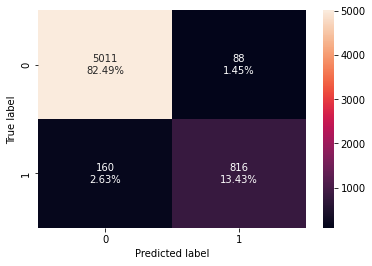

In [ ]:
confusion_matrix_sklearn(abc, X_train, y_train)

In [ ]:
#Calculating the performance on Training set
abc_model_train_perf = model_performance_classification_sklearn(abc, X_train, y_train)
print("abc Training performance:")
abc_model_train_perf

abc Training performance:


Accuracy  Recall  Precision    F1
0     0.959   0.836      0.903 0.868

In [ ]:
# Calculating different metrics on validation set
abc_model_val_perf = model_performance_classification_sklearn(abc, X_val, y_val)
print("abc Validation performance:")
abc_model_val_perf

abc Validation performance:


Accuracy  Recall  Precision    F1
0     0.953   0.813      0.886 0.848

Unlike the Bagging models, this model does not overfit the data and the recall value is also good.

### Gradient Boosting - Default data

In [ ]:
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

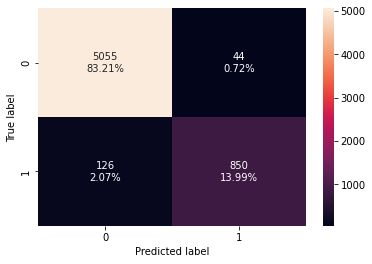

In [ ]:
confusion_matrix_sklearn(gbc, X_train, y_train)

In [ ]:
#Calculating the performance on Training set
gbc_model_train_perf = model_performance_classification_sklearn(gbc, X_train, y_train)
print("gbc Training performance:")
gbc_model_train_perf

gbc Training performance:


Accuracy  Recall  Precision    F1
0     0.972   0.871      0.951 0.909

In [ ]:
# Calculating different metrics on validation set
gbc_model_val_perf = model_performance_classification_sklearn(gbc, X_val, y_val)
print("gbc Validation performance:")
gbc_model_val_perf

gbc Validation performance:


Accuracy  Recall  Precision    F1
0     0.962   0.816      0.943 0.875

This model has slightly better recall on the training set when compared to the adaboost model, but the recall on the validation set has dropped. Hence, there could be a slight overfitting.

In [ ]:
# defining list of models
models = [lr, dTree, bagging_estimator,rf_estimator,abc, gbc]

# defining empty lists to add train and test results
acc_train = []
acc_val = []
recall_train = []
recall_val = []
precision_train = []
precision_val = []

# looping through all the models to get the accuracy, precall and precision scores
for model in models:
    j = get_metrics_score(model,False)
    acc_train.append(np.round(j[0],2))
    acc_val.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_val.append(np.round(j[3],2))
    precision_train.append(np.round(j[4],2))
    precision_val.append(np.round(j[5],2))

In [ ]:
comparison_frame = pd.DataFrame({'Model':['Logistic Regression with default data','Decision Tree with default data','Default Bagging Classifier with default data',
                                         'Random Forest with deafult data',
                                         'AdaBoost with default data','Gradient Boosting with default data'],
                                          'Train_Accuracy': acc_train,'Validation_Accuracy': acc_val,
                                          'Train_Recall':recall_train,'Validation_Recall':recall_val,
                                          'Train_Precision':precision_train,'Validation_Precision':precision_val})
comparison_frame

Model  Train_Accuracy  \
0         Logistic Regression with default data           0.910   
1               Decision Tree with default data           1.000   
2  Default Bagging Classifier with default data           1.000   
3               Random Forest with deafult data           1.000   
4                    AdaBoost with default data           0.960   
5           Gradient Boosting with default data           0.970   

   Validation_Accuracy  Train_Recall  Validation_Recall  Train_Precision  \
0                0.920         0.590              0.630            0.780   
1                0.940         1.000              0.780            1.000   
2                0.960         0.980              0.810            1.000   
3                0.950         1.000              0.740            1.000   
4                0.950         0.840              0.810            0.900   
5                0.960         0.870              0.820            0.950   

   Validation_Precision  
0                 0.830  
1                 0.820  
2                 0.910  
3                 0.930  
4                 0.890  
5                 0.940

The best model out of the above is the **AdaBoost model** because of less overfitting and higher recall on validation set

## Over Sampling

In [ ]:
print("Before Oversampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After Oversampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label 'Yes': 976
Before Oversampling, counts of label 'No': 5099 

After Oversampling, counts of label 'Yes': 5099
After Oversampling, counts of label 'No': 5099 

After Oversampling, the shape of train_X: (10198, 46)
After Oversampling, the shape of train_y: (10198,) 



### Logistic Regression - Over Sampled data

In [ ]:
log_reg_over = LogisticRegression(random_state=1)

# Training the basic logistic regression model with training set
log_reg_over.fit(X_train_over, y_train_over)

LogisticRegression(random_state=1)

In [ ]:
# Calculating different metrics on train set
log_reg_over_train_perf = model_performance_classification_sklearn(log_reg_over, X_train_over, y_train_over)
print("Logistic Regression Training performance:")
log_reg_over_train_perf

Logistic Regression Training performance:


Accuracy  Recall  Precision    F1
0     0.780   0.772      0.785 0.778

In [ ]:
# Calculating different metrics on validation set
log_reg_over_val_perf = model_performance_classification_sklearn(log_reg_over, X_val, y_val)
print("Logistic Regression validation performance:")
log_reg_over_val_perf

Logistic Regression validation performance:


Accuracy  Recall  Precision    F1
0     0.790   0.727      0.414 0.527

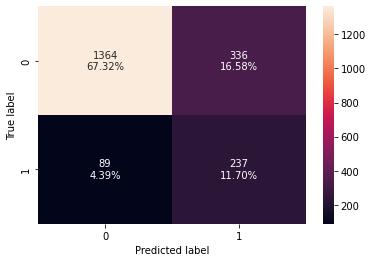

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn(log_reg_over, X_val, y_val)

This model seems to have better recall than the one with default data

### Decision Tree - Over sampled data

In [ ]:
dTree_over = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree_over.fit(X_train_over, y_train_over)

DecisionTreeClassifier(random_state=1)

In [ ]:
# Calculating different metrics on train set
dTree_over_train_perf = model_performance_classification_sklearn(dTree_over, X_train_over, y_train_over)
print("Decision Tree Training performance:")
dTree_over_train_perf

Decision Tree Training performance:


Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000

In [ ]:
# Calculating different metrics on validation set
dTree_over_val_perf = model_performance_classification_sklearn(dTree_over, X_val, y_val)
print("Decision Tree validation performance:")
dTree_over_val_perf

Decision Tree validation performance:


Accuracy  Recall  Precision    F1
0     0.933   0.819      0.778 0.798

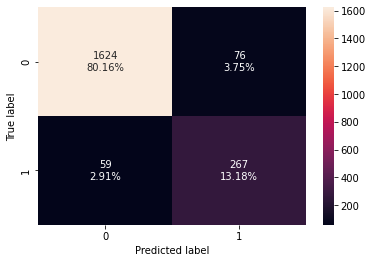

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn(dTree_over, X_val, y_val)

This model has reduced accuracy, increased recall and reduced precision when compared to the same model with default data

### Default Bagging Classifier - Oversampled data

In [ ]:
#base_estimator for bagging classifier is a decision tree by default
bagging_estimator_over=BaggingClassifier(random_state=1)
bagging_estimator_over.fit(X_train_over,y_train_over)

BaggingClassifier(random_state=1)

In [ ]:
# Calculating different metrics on train set
bagging_estimator_over_train_perf = model_performance_classification_sklearn(bagging_estimator_over, X_train_over, y_train_over)
print("bagging_estimator_over Training performance:")
bagging_estimator_over_train_perf

bagging_estimator_over Training performance:


Accuracy  Recall  Precision    F1
0     0.998   0.998      0.999 0.998

In [ ]:
# Calculating different metrics on validation set
bagging_estimator_over_val_perf = model_performance_classification_sklearn(bagging_estimator_over, X_val, y_val)
print("bagging_estimator_over validation performance:")
bagging_estimator_over_val_perf

bagging_estimator_over validation performance:


Accuracy  Recall  Precision    F1
0     0.952   0.850      0.850 0.850

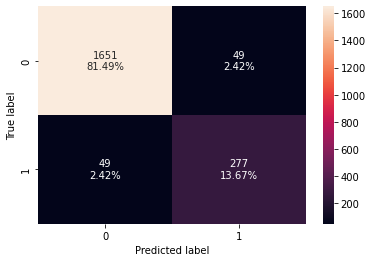

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn(bagging_estimator_over, X_val, y_val)

This model has increased recall and decreased precision when compared to the same model with default data

### Random Forest Classifier - Oversampled data

In [ ]:
#Train the random forest classifier
rf_estimator_over=RandomForestClassifier(random_state=1)
rf_estimator_over.fit(X_train_over,y_train_over)

RandomForestClassifier(random_state=1)

In [ ]:
# Calculating different metrics on train set
rf_estimator_over_train_perf = model_performance_classification_sklearn(rf_estimator_over, X_train_over, y_train_over)
print("rf_estimator_over Training performance:")
rf_estimator_over_train_perf

rf_estimator_over Training performance:


Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000

In [ ]:
# Calculating different metrics on validation set
rf_estimator_over_val_perf = model_performance_classification_sklearn(rf_estimator_over, X_val, y_val)
print("rf_estimator_over validation performance:")
rf_estimator_over_val_perf

rf_estimator_over validation performance:


Accuracy  Recall  Precision    F1
0     0.946   0.779      0.873 0.823

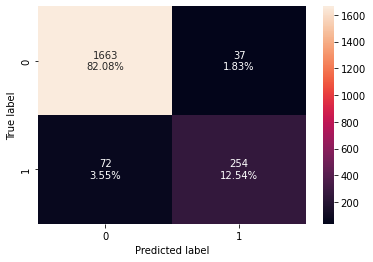

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn(rf_estimator_over, X_val, y_val)

This model has increased recall and decreased precision when compared to the same model with default data

### AdaBoost model - Oversampled Data

In [ ]:
abc_over = AdaBoostClassifier(random_state=1)
abc_over.fit(X_train_over,y_train_over)

AdaBoostClassifier(random_state=1)

In [ ]:
# Calculating different metrics on train set
abc_over_train_perf = model_performance_classification_sklearn(abc_over, X_train_over, y_train_over)
print("abc_over Training performance:")
abc_over_train_perf

abc_over Training performance:


Accuracy  Recall  Precision    F1
0     0.970   0.971      0.968 0.970

In [ ]:
# Calculating different metrics on validation set
abc_over_val_perf = model_performance_classification_sklearn(abc_over, X_val, y_val)
print("abc_over validation performance:")
abc_over_val_perf

abc_over validation performance:


Accuracy  Recall  Precision    F1
0     0.953   0.883      0.835 0.858

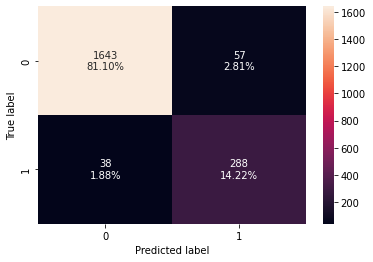

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn(abc_over, X_val, y_val)

This model has increased recall and decreased precision when compared to the same model with default data

### Gradient Boositng - Oversampled data

In [ ]:
gbc_over = GradientBoostingClassifier(random_state=1)
gbc_over.fit(X_train_over,y_train_over)

GradientBoostingClassifier(random_state=1)

In [ ]:
# Calculating different metrics on train set
gbc_over_train_perf = model_performance_classification_sklearn(gbc_over, X_train_over, y_train_over)
print("gbc_over Training performance:")
gbc_over_train_perf

gbc_over Training performance:


Accuracy  Recall  Precision    F1
0     0.981   0.981      0.981 0.981

In [ ]:
# Calculating different metrics on validation set
gbc_over_val_perf = model_performance_classification_sklearn(gbc_over, X_val, y_val)
print("gbc_over validation performance:")
gbc_over_val_perf

gbc_over validation performance:


Accuracy  Recall  Precision    F1
0     0.960   0.887      0.868 0.877

This model has increased recall and decreased precision when compared to the same model with default data

In [ ]:
# defining list of models
models = [log_reg_over, dTree_over, bagging_estimator_over,rf_estimator_over,abc_over, gbc_over]

# defining empty lists to add train and test results
acc_train = []
acc_val = []
recall_train = []
recall_val = []
precision_train = []
precision_val = []

# looping through all the models to get the accuracy, precall and precision scores
for model in models:
    j = get_metrics_score(model,False)
    acc_train.append(np.round(j[0],2))
    acc_val.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_val.append(np.round(j[3],2))
    precision_train.append(np.round(j[4],2))
    precision_val.append(np.round(j[5],2))

In [ ]:
comparison_frame = pd.DataFrame({'Model':['Logistic Regression with Oversampled data','Decision Tree with Oversampled data','Default Bagging Classifier with Oversampled data',
                                         'Random Forest with Oversampled data',
                                         'AdaBoost with Oversampled data','Gradient Boosting with Oversampled data'],
                                          'Train_Accuracy': acc_train,'Validation_Accuracy': acc_val,
                                          'Train_Recall':recall_train,'Validation_Recall':recall_val,
                                          'Train_Precision':precision_train,'Validation_Precision':precision_val})

In [ ]:
comparison_frame

Model  Train_Accuracy  \
0         Logistic Regression with Oversampled data           0.780   
1               Decision Tree with Oversampled data           1.000   
2  Default Bagging Classifier with Oversampled data           1.000   
3               Random Forest with Oversampled data           1.000   
4                    AdaBoost with Oversampled data           0.950   
5           Gradient Boosting with Oversampled data           0.970   

   Validation_Accuracy  Train_Recall  Validation_Recall  Train_Precision  \
0                0.790         0.730              0.730            0.400   
1                0.930         1.000              0.820            1.000   
2                0.950         0.990              0.850            0.990   
3                0.950         1.000              0.780            1.000   
4                0.950         0.870              0.880            0.840   
5                0.960         0.910              0.890            0.900   

   Validation_Precision  
0                 0.410  
1                 0.780  
2                 0.850  
3                 0.870  
4                 0.830  
5                 0.870

Out of all the models above, the best one for the data with oversampled data is **Gradient Boosting model** because of less overfitting and high recall

## Under Sampling

In [ ]:
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [ ]:
print("Before Undersampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Undersampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Undersampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Undersampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Undersampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Undersampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Undersampling, counts of label 'Yes': 976
Before Undersampling, counts of label 'No': 5099 

After Undersampling, counts of label 'Yes': 976
After Undersampling, counts of label 'No': 976 

After Undersampling, the shape of train_X: (1952, 46)
After Undersampling, the shape of train_y: (1952,) 



### Logistic Regression - Undersampled data

In [ ]:
log_reg_under = LogisticRegression(random_state=1)

# Training the basic logistic regression model with training set
log_reg_under.fit(X_train_un, y_train_un)

LogisticRegression(random_state=1)

In [ ]:
# Calculating different metrics on train set
log_reg_under_train_perf = model_performance_classification_sklearn(log_reg_under, X_train_un, y_train_un)
print("Training performance:")
log_reg_under_train_perf

Training performance:


Accuracy  Recall  Precision    F1
0     0.798   0.817      0.788 0.802

In [ ]:
# Calculating different metrics on validation set
log_reg_under_val_perf = model_performance_classification_sklearn(log_reg_under, X_val, y_val)
print("Validation performance:")
log_reg_under_val_perf

Validation performance:


Accuracy  Recall  Precision    F1
0     0.793   0.822      0.425 0.561

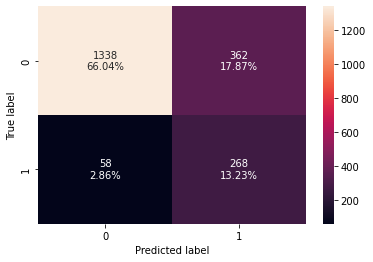

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn(log_reg_under, X_val, y_val)

This model has good recall for the validation when compared to the same model with default data but has very poor precision





### Decision Tree - Under sampled data

In [ ]:
dTree_under = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree_under.fit(X_train_un, y_train_un)

DecisionTreeClassifier(random_state=1)

In [ ]:
# Calculating different metrics on train set
dTree_under_train_perf = model_performance_classification_sklearn(dTree_under, X_train_un, y_train_un)
print("Training performance:")
dTree_under_train_perf

Training performance:


Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000

In [ ]:
# Calculating different metrics on validation set
dTree_under_val_perf = model_performance_classification_sklearn(dTree_under, X_val, y_val)
print("Validation performance:")
dTree_under_val_perf

Validation performance:


Accuracy  Recall  Precision    F1
0     0.876   0.883      0.574 0.696

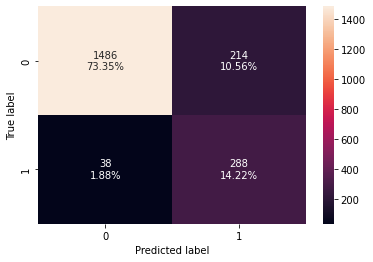

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn(dTree_under, X_val, y_val)

This model has good recall for the validation when compared to the same model with default data but has very poor precision. Also there is lot of overfitting

### Default Bagging Classifier - Under sampled data

In [ ]:
#base_estimator for bagging classifier is a decision tree by default
bagging_estimator_under=BaggingClassifier(random_state=1)
bagging_estimator_under.fit(X_train_un,y_train_un)

BaggingClassifier(random_state=1)

In [ ]:
# Calculating different metrics on train set
bagging_estimator_under_train_perf = model_performance_classification_sklearn(bagging_estimator_under, X_train_un, y_train_un)
print("Training performance:")
bagging_estimator_under_train_perf

Training performance:


Accuracy  Recall  Precision    F1
0     0.995   0.990      1.000 0.995

In [ ]:
# Calculating different metrics on validation set
bagging_estimator_under_val_perf = model_performance_classification_sklearn(bagging_estimator_under, X_val, y_val)
print("Validation performance:")
bagging_estimator_under_val_perf

Validation performance:


Accuracy  Recall  Precision    F1
0     0.923   0.917      0.699 0.793

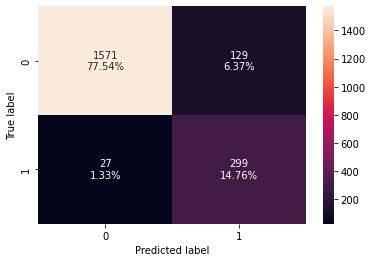

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn(bagging_estimator_under, X_val, y_val)

This model has good recall for the validation when compared to the same model with default data but has very poor precision

### Random Forest - Undersampled data

In [ ]:
#Train the random forest classifier
rf_estimator_under=RandomForestClassifier(random_state=1)
rf_estimator_under.fit(X_train_un,y_train_un)

RandomForestClassifier(random_state=1)

In [ ]:
# Calculating different metrics on train set
rf_estimator_under_train_perf = model_performance_classification_sklearn(rf_estimator_under, X_train_un, y_train_un)
print("Training performance:")
rf_estimator_under_train_perf

Training performance:


Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000

In [ ]:
# Calculating different metrics on validation set
rf_estimator_under_val_perf = model_performance_classification_sklearn(rf_estimator_under, X_val, y_val)
print("Validation performance:")
rf_estimator_under_val_perf

Validation performance:


Accuracy  Recall  Precision    F1
0     0.923   0.929      0.697 0.796

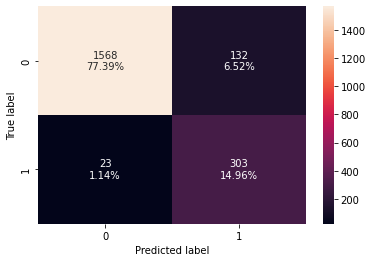

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn(rf_estimator_under, X_val, y_val)

This model has good recall for the validation when compared to the same model with default data but has very poor precision. Also there is lot of overfitting

### AdaBoost - Undersampled data

In [ ]:
abc_under = AdaBoostClassifier(random_state=1)
abc_under.fit(X_train_un,y_train_un)

AdaBoostClassifier(random_state=1)

In [ ]:
# Calculating different metrics on train set
abc_under_train_perf = model_performance_classification_sklearn(abc_under, X_train_un, y_train_un)
print("Training performance:")
abc_under_train_perf

Training performance:


Accuracy  Recall  Precision    F1
0     0.943   0.949      0.938 0.943

In [ ]:
# Calculating different metrics on validation set
abc_under_val_perf = model_performance_classification_sklearn(abc_under, X_val, y_val)
print("Validation performance:")
abc_under_val_perf

Validation performance:


Accuracy  Recall  Precision    F1
0     0.921   0.942      0.684 0.792

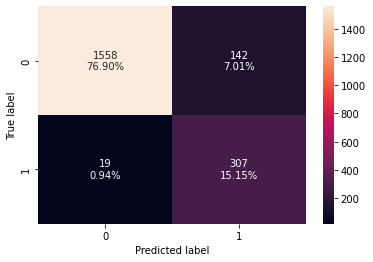

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn(abc_under, X_val, y_val)

This model has good recall for the validation when compared to the same model with default data but has poor precision

### Gradient Boosting - Undersampled data

In [ ]:
gbc_under = GradientBoostingClassifier(random_state=1)
gbc_under.fit(X_train_un,y_train_un)

GradientBoostingClassifier(random_state=1)

In [ ]:
# Calculating different metrics on train set
gbc_under_train_perf = model_performance_classification_sklearn(gbc_under, X_train_un, y_train_un)
print("Training performance:")
gbc_under_train_perf

Training performance:


Accuracy  Recall  Precision    F1
0     0.972   0.980      0.966 0.973

In [ ]:
# Calculating different metrics on validation set
gbc_under_val_perf = model_performance_classification_sklearn(gbc_under, X_val, y_val)
print("Validation performance:")
gbc_under_val_perf

Validation performance:


Accuracy  Recall  Precision    F1
0     0.933   0.942      0.724 0.819

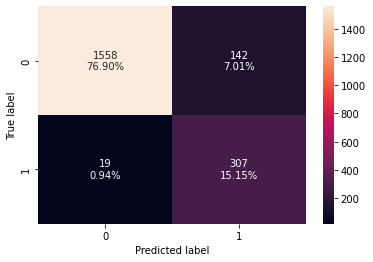

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn(abc_under, X_val, y_val)

The precision on the validation is okay but has great recall

In [ ]:
# defining list of models
models = [log_reg_under, dTree_under, bagging_estimator_under,rf_estimator_under,abc_under, gbc_under]

# defining empty lists to add train and test results
acc_train = []
acc_val = []
recall_train = []
recall_val = []
precision_train = []
precision_val = []

# looping through all the models to get the accuracy, precall and precision scores
for model in models:
    j = get_metrics_score(model,False)
    acc_train.append(np.round(j[0],2))
    acc_val.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_val.append(np.round(j[3],2))
    precision_train.append(np.round(j[4],2))
    precision_val.append(np.round(j[5],2))

In [ ]:
comparison_frame = pd.DataFrame({'Model':['Logistic Regression with Undersampled data','Decision Tree with Undersampled data','Default Bagging Classifier with Undersampled data',
                                         'Random Forest with Undersampled data',
                                         'AdaBoost with Undersampled data','Gradient Boosting with Undersampled data'],
                                          'Train_Accuracy': acc_train,'Validation_Accuracy': acc_val,
                                          'Train_Recall':recall_train,'Validation_Recall':recall_val,
                                          'Train_Precision':precision_train,'Validation_Precision':precision_val})

In [ ]:
comparison_frame

Model  Train_Accuracy  \
0         Logistic Regression with Undersampled data           0.780   
1               Decision Tree with Undersampled data           0.910   
2  Default Bagging Classifier with Undersampled data           0.940   
3               Random Forest with Undersampled data           0.940   
4                    AdaBoost with Undersampled data           0.930   
5           Gradient Boosting with Undersampled data           0.940   

   Validation_Accuracy  Train_Recall  Validation_Recall  Train_Precision  \
0                0.790         0.820              0.820            0.410   
1                0.880         1.000              0.880            0.640   
2                0.920         0.990              0.920            0.740   
3                0.920         1.000              0.930            0.720   
4                0.920         0.950              0.940            0.710   
5                0.930         0.980              0.940            0.730   

   Validation_Precision  
0                 0.430  
1                 0.570  
2                 0.700  
3                 0.700  
4                 0.680  
5                 0.720

Of all the models above with undersampled data, the best model is **Default Bagging classifier with under sampled data** because this is the model with decent precision, less overfitting and good recall

## Hyper Parameter Tuning using Random search

### Bagging classifier tuned with undersampled data

In [ ]:
# Choose the type of classifier.
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {'max_samples': [0.7,0.8,0.9,1],
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the random search
grid_obj = RandomizedSearchCV(bagging_estimator_tuned, parameters,n_iter=30, scoring=acc_scorer,cv=5, random_state = 1, n_jobs = -1, verbose = 2)
# using n_iter = 30, so randomized search will try 30 different combinations of hyperparameters
# by default, n_iter = 10

grid_obj = grid_obj.fit(X_train_un, y_train_un)

# Print the best combination of parameters
grid_obj.best_params_

Fitting 5 folds for each of 30 candidates, totalling 150 fits


{'max_features': 0.8, 'max_samples': 1, 'n_estimators': 50}

In [ ]:
bagging_estimator_tuned_rs = BaggingClassifier(max_samples=1,max_features=0.8,n_estimators=50)
bagging_estimator_tuned_rs.fit(X_train_un,y_train_un)

BaggingClassifier(max_features=0.8, max_samples=1, n_estimators=50)

In [ ]:
# Checking recall score on train and validation set
print("Recall on train and validation set")
print(recall_score(y_train_un, bagging_estimator_tuned_rs.predict(X_train_un)))
print(recall_score(y_val, bagging_estimator_tuned_rs.predict(X_val)))
print("")
print("Precision on train and validation set")
# Checking precision score on train and validation set
print(precision_score(y_train_un, bagging_estimator_tuned_rs.predict(X_train_un)))
print(precision_score(y_val, bagging_estimator_tuned_rs.predict(X_val)))
print("")
print("Accuracy on train and validation set")
# Checking accuracy score on train and validation set
print(accuracy_score(y_train_un, bagging_estimator_tuned_rs.predict(X_train_un)))
print(accuracy_score(y_val, bagging_estimator_tuned_rs.predict(X_val)))

Recall on train and validation set
1.0
1.0

Precision on train and validation set
0.5
0.16090819348469892

Accuracy on train and validation set
0.5
0.16090819348469892


Great Recall on training and validation set but very less precision

### AdaBoost Classifier with Default data

In [ ]:
# Choose the type of classifier.
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1, random_state=1),DecisionTreeClassifier(max_depth=2, random_state=1)],
    "n_estimators": np.arange(10,100,10),
    "learning_rate":np.arange(0.1,1,0.1)
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the random search
grid_obj = RandomizedSearchCV(abc_tuned, parameters,n_iter=30, scoring=acc_scorer,cv=5, random_state = 1, n_jobs = -1, verbose = 2)
# using n_iter = 30, so randomized search will try 30 different combinations of hyperparameters
# by default, n_iter = 10

grid_obj = grid_obj.fit(X_train, y_train)

# Print the best combination of parameters
grid_obj.best_params_


Fitting 5 folds for each of 30 candidates, totalling 150 fits


{'base_estimator': DecisionTreeClassifier(max_depth=2, random_state=1),
 'learning_rate': 0.7000000000000001,
 'n_estimators': 90}

In [ ]:
adb_tuned2 = AdaBoostClassifier(
    n_estimators=90,
    learning_rate=0.7,
    random_state=1,
    base_estimator=DecisionTreeClassifier(max_depth=2, random_state=1),
)

# Fit the model on training data
adb_tuned2.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                         random_state=1),
                   learning_rate=0.7, n_estimators=90, random_state=1)

In [ ]:
# Checking recall score on train and validation set
print("Recall on train and validation set")
print(recall_score(y_train, adb_tuned2.predict(X_train)))
print(recall_score(y_val, adb_tuned2.predict(X_val)))
print("")
print("Precision on train and validation set")
# Checking precision score on train and validation set
print(precision_score(y_train, adb_tuned2.predict(X_train)))
print(precision_score(y_val, adb_tuned2.predict(X_val)))
print("")
print("Accuracy on train and validation set")
# Checking accuracy score on train and validation set
print(accuracy_score(y_train, adb_tuned2.predict(X_train)))
print(accuracy_score(y_val, adb_tuned2.predict(X_val)))

Recall on train and validation set
0.9538934426229508
0.8680981595092024

Precision on train and validation set
0.9657676348547718
0.9370860927152318

Accuracy on train and validation set
0.9871604938271605
0.9693978282329714


Great accuracy and precision.

### Gradient Boosting with Oversampled data

In [ ]:
# Choose the type of classifier.
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the random search
grid_obj = RandomizedSearchCV(gbc_tuned, parameters,n_iter=30, scoring=acc_scorer,cv=5, random_state = 1, n_jobs = -1, verbose = 2)
# using n_iter = 30, so randomized search will try 30 different combinations of hyperparameters
# by default, n_iter = 10

grid_obj = grid_obj.fit(X_train_over, y_train_over)

# Print the best combination of parameters
grid_obj.best_params_

Fitting 5 folds for each of 30 candidates, totalling 150 fits


{'max_features': 0.9, 'n_estimators': 100, 'subsample': 0.8}

In [ ]:
gbc_tuned_rs = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1,
                                          n_estimators= 100,
                                          subsample= 0.8,
                                          max_features= 0.9)
gbc_tuned_rs.fit(X_train_over, y_train_over)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.9, random_state=1, subsample=0.8)

In [ ]:
# Checking recall score on train and validation set
print("Recall on train and validation set")
print(recall_score(y_train_over, gbc_tuned_rs.predict(X_train_over)))
print(recall_score(y_val, gbc_tuned_rs.predict(X_val)))
print("")
print("Precision on train and validation set")
# Checking precision score on train and validation set
print(precision_score(y_train_over, gbc_tuned_rs.predict(X_train_over)))
print(precision_score(y_val, gbc_tuned_rs.predict(X_val)))
print("")
print("Accuracy on train and validation set")
# Checking accuracy score on train and validation set
print(accuracy_score(y_train_over, gbc_tuned_rs.predict(X_train_over)))
print(accuracy_score(y_val, gbc_tuned_rs.predict(X_val)))

Recall on train and validation set
0.9829378309472445
0.8834355828220859

Precision on train and validation set
0.981590285938112
0.8648648648648649

Accuracy on train and validation set
0.9822514218474211
0.9590325765054294


In [ ]:
# defining list of models
models = [bagging_estimator_tuned_rs,adb_tuned2,gbc_tuned_rs]

# defining empty lists to add train and test results
acc_train = []
acc_val = []
recall_train = []
recall_val = []
precision_train = []
precision_val = []

# looping through all the models to get the accuracy, precall and precision scores
for model in models:
    j = get_metrics_score(model,False)
    acc_train.append(np.round(j[0],2))
    acc_val.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_val.append(np.round(j[3],2))
    precision_train.append(np.round(j[4],2))
    precision_val.append(np.round(j[5],2))

In [ ]:
comparison_frame = pd.DataFrame({'Model':['Default Bagging Classifier with Undersampled data',
                                         'AdaBoost with default data','Gradient Boosting with oversampled data'],
                                          'Train_Accuracy': acc_train,'Validation_Accuracy': acc_val,
                                          'Train_Recall':recall_train,'Validation_Recall':recall_val,
                                          'Train_Precision':precision_train,'Validation_Precision':precision_val})

In [ ]:
comparison_frame

Model  Train_Accuracy  \
0  Default Bagging Classifier with Undersampled data           0.160   
1                         AdaBoost with default data           0.990   
2            Gradient Boosting with oversampled data           0.970   

   Validation_Accuracy  Train_Recall  Validation_Recall  Train_Precision  \
0                0.160         1.000              1.000            0.160   
1                0.970         0.950              0.870            0.970   
2                0.960         0.920              0.880            0.910   

   Validation_Precision  
0                 0.160  
1                 0.940  
2                 0.860

Considering the recall score and the overfitting criteria, the best model here is **Gradient Boosting with Oversampled Data**

### Pipeline

In [ ]:
# To help with reading and manipulating data
import pandas as pd
import numpy as np

# To help with data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# To be used for missing value imputation
from sklearn.impute import SimpleImputer

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
)

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To be used for tuning the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

In [ ]:
# to work with dataframes
import pandas as pd
import numpy as np

# to split data into train and test
from sklearn.model_selection import train_test_split

# to build logistic regression model
from sklearn.linear_model import LogisticRegression

# to create k folds of data and get cross validation score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# to create pipeline and make_pipeline
from sklearn.pipeline import Pipeline, make_pipeline

# to use standard scaler
from sklearn.preprocessing import StandardScaler

# to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# defining pipe using make_pipeline
pipe = make_pipeline(StandardScaler(), (GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1,
                                          n_estimators= 100,
                                          subsample= 0.8,
                                          max_features= 0.9)))

In [ ]:
# we can see that make_pipeline itself assigned names to all the objects
pipe.steps

[('standardscaler', StandardScaler()),
 ('gradientboostingclassifier',
  GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                             max_features=0.9, random_state=1, subsample=0.8))]

In [ ]:
# pipe object's accuracy on the train set
pipe.score(X_train_over, y_train_)

**Conclusion:**
* We considered 6 models on 3 different data sets - default data, oversampled data, and undersampled data. Totally 18 models.
* Generally, random forest, decision tree models overfit.
* Of all the models, Gradient Boosting with Oversampled data had higher recall and less overfitting. Hence this is the best model.

**Business Insights:**

* Lower transcation count on credit card , less revolving balance , less transcational amount are an indication that customer will attrite. Lower transcation indicate customer is not using this credit card , bank should offer more rewards or cashback or some other offers to customer to use the credit card more.
* As per the EDA if customer hold more product with the bank he/she is less likely to attrite.Bank can offer more product to such customers so they buy more products which will help retain such customers
* Customers who have been inactive for a month show high chances of attrition.Bank should focus on such customers as well.
* Avg utilization ratio is lower amongst attrited customers.
* As per EDA Customer in age range 36-55 ,who were doctorate or postgraduate ,or Female attrited more. One of the reasons can be some competitive bank is offering them better deals leading to lesser user of this banks credit card.
* As per the EDA Customers who have had high number of contacts with the bank in the last 12 months have attrited. This needs to be investigated whether there were any issues of customers which were not resolved leading into customer leaving the bank.